<a href="https://colab.research.google.com/github/roapple10/Python-learning-note/blob/main/IBN_HR_analysis_Kaggle(_SMOTE_and_Automatic_feature_selection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 1

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
# sns.color_palette("Set3", as_cmap=True)
sns.set_style('darkgrid')
%matplotlib inline

In [10]:
pd.options.display.max_columns = 200
pd.options.display.max_rows =200

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle learning/dataKaggle/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

### Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
df.shape

(1470, 35)

In [14]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [15]:
df[numeric_cols].head()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   
2                3           2090         2396                   6   
3                3           2909        23159                   1   
4                2           3468        16632                   9   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 0                  8                      0   
1             80                 1                 10                      3   
2             80                 0                  7                      3   
3             80                 0                  8                      3   
4             80                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [16]:
df[categorical_cols].head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes  
3     Research Scientist       Married      Y      Yes  
4  Laboratory Technician       Married      Y       No

In [17]:
missing_counts = df[numeric_cols].isna().sum().sort_values(ascending = False)
missing_counts[missing_counts>0]

Series([], dtype: int64)

In [18]:
missing_counts = df[categorical_cols].isna().sum().sort_values(ascending = False)
missing_counts[missing_counts>0]

Series([], dtype: int64)

In [19]:
df[numeric_cols].describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [20]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

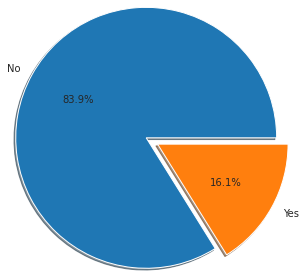

In [21]:
r = df.groupby('Attrition')['Attrition'].count()
plt.pie(r,explode=(0.05,0.1),labels=['No','Yes'],radius=1.5, autopct ='%1.1f%%',shadow=True )
plt.show()

In [22]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [23]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [24]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [25]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [26]:
# Reassign target
df['Attrition'] = df['Attrition'].map({"No":0,"Yes":1})


In [27]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [28]:
# Drop useless feat
df = df.drop(columns=['StandardHours','EmployeeCount','Over18'])

### Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


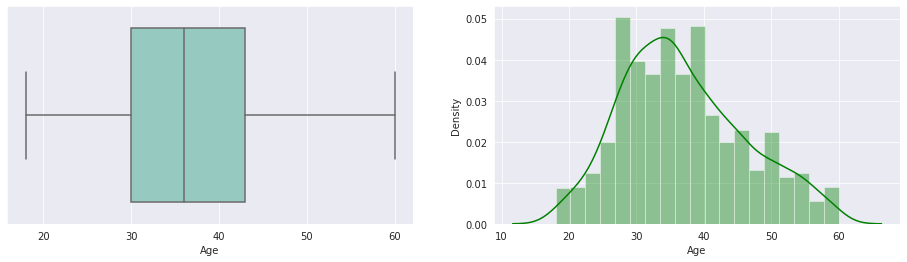

In [29]:
fig,axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3",x=df['Age'])
sns.distplot(ax=axes[1],color="Green",a=df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


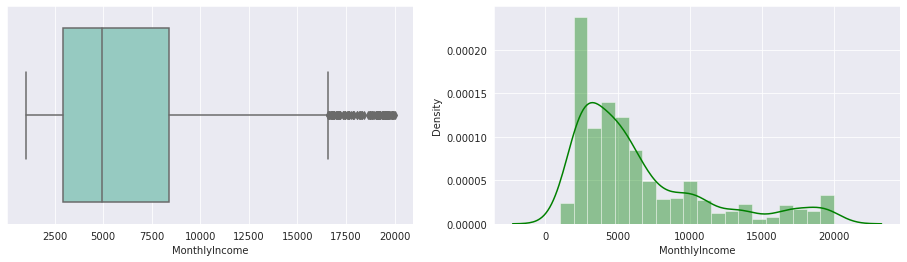

In [30]:
fig,axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3",x=df['MonthlyIncome'])
sns.distplot(ax=axes[1],color="Green",a=df['MonthlyIncome'])

In [31]:
len(df[df['MonthlyIncome']>17500])

81

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


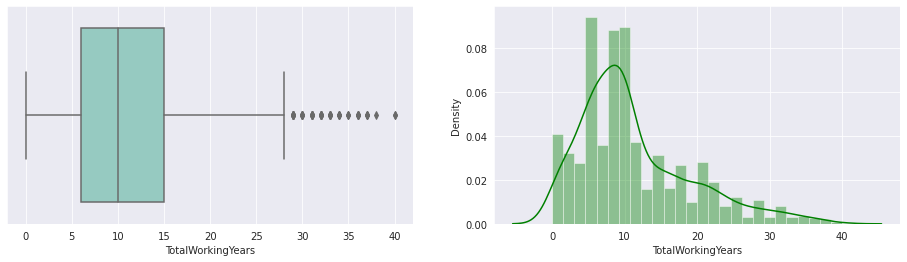

In [32]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3", x=df['TotalWorkingYears'])
sns.distplot(ax=axes[1],color="Green", a=df["TotalWorkingYears"])

In [33]:
len(df[df['TotalWorkingYears']>28])

63

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


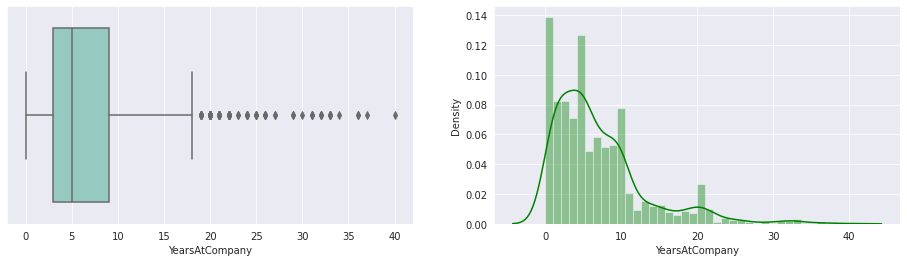

In [34]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3", x=df['YearsAtCompany'])
sns.distplot(ax=axes[1],color="Green", a=df["YearsAtCompany"])

In [35]:
len(df[df['YearsAtCompany']>18])

104

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


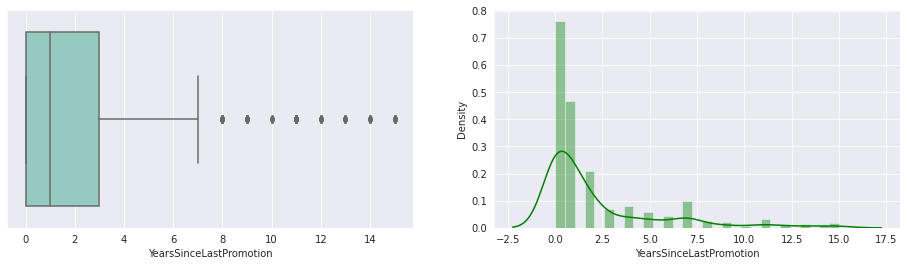

In [36]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3", x=df['YearsSinceLastPromotion'])
sns.distplot(ax=axes[1],color="Green", a=df["YearsSinceLastPromotion"])

In [37]:
len(df[df['YearsSinceLastPromotion']>7])

107

In [38]:
len(df)

1470

In [39]:
df = df[df['YearsSinceLastPromotion']<7]

In [40]:
len(df)

1287

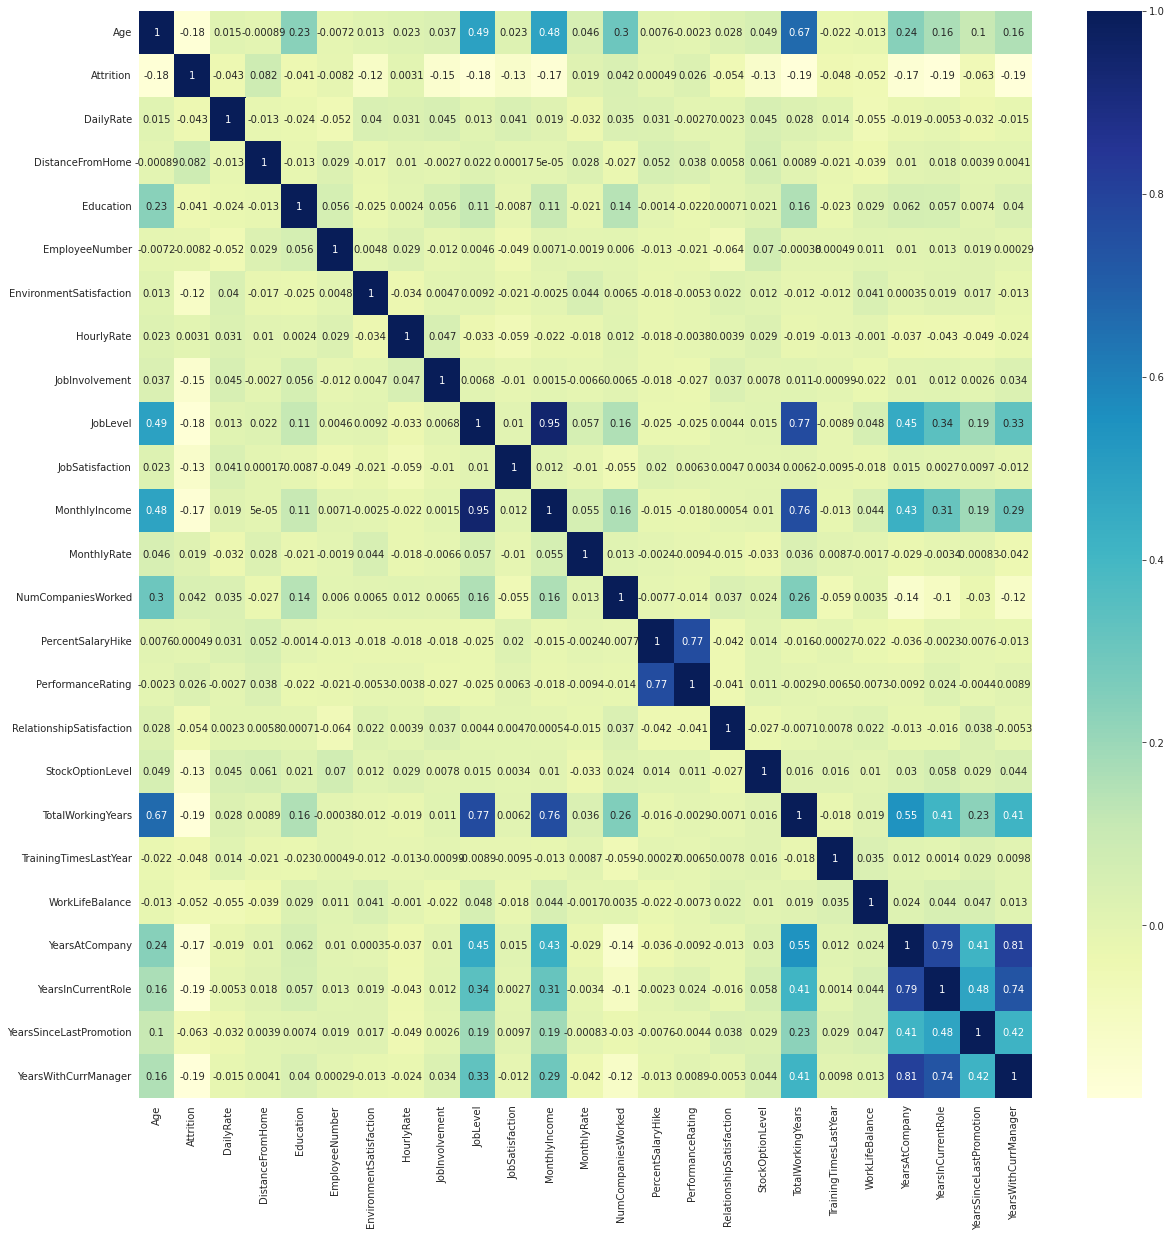

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

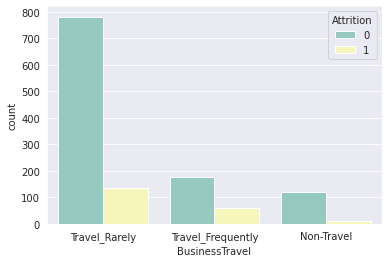

In [42]:
sns.countplot(x='BusinessTravel',palette = 'Set3', hue='Attrition', data = df)

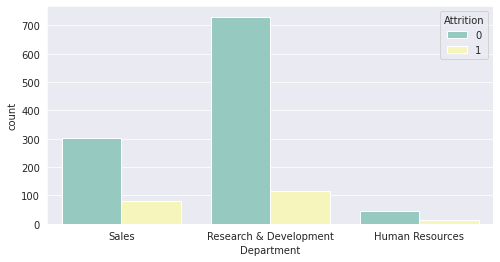

In [43]:
plt.figure(figsize=(8,4))
sns.countplot(x='Department',hue='Attrition',palette="Set3",data=df)

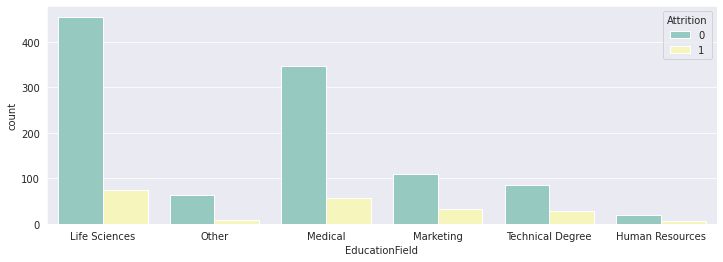

In [44]:
plt.figure(figsize=(12,4))
sns.countplot(x='EducationField',hue='Attrition',palette="Set3",data=df)

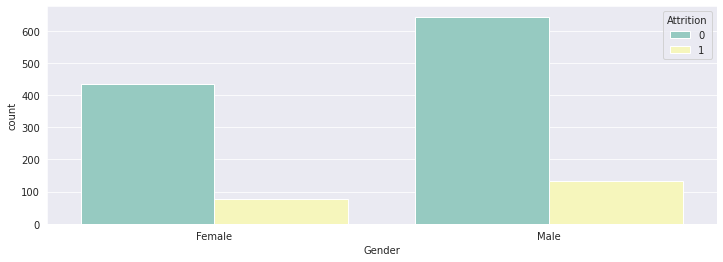

In [45]:
plt.figure(figsize=(12,4))
sns.countplot(x='Gender',hue='Attrition',palette="Set3",data=df)

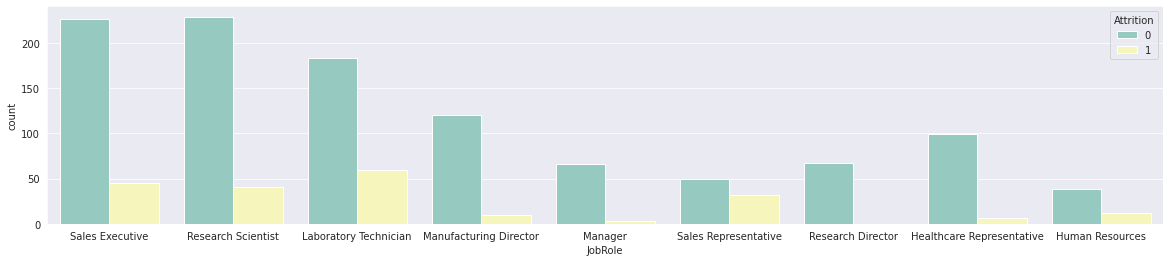

In [46]:
plt.figure(figsize=(20,4))
sns.countplot(x='JobRole',hue='Attrition',palette="Set3",data=df)

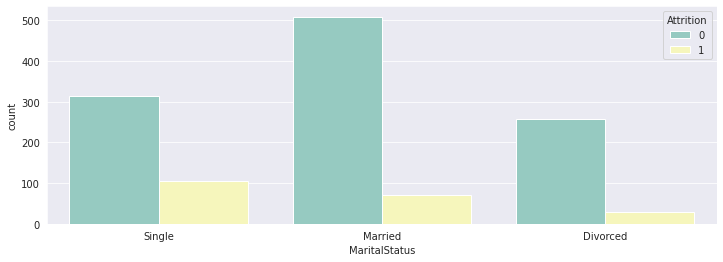

In [47]:
plt.figure(figsize=(12,4))
sns.countplot(x='MaritalStatus',hue='Attrition',palette="Set3",data=df)

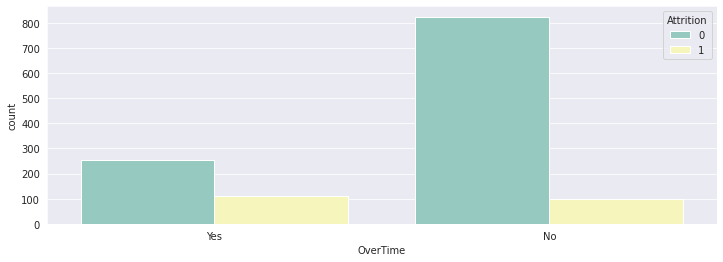

In [48]:
plt.figure(figsize=(12,4))
sns.countplot(x='OverTime',hue='Attrition',palette="Set3",data=df)

### Preparing data for training

初學Python手記#3-資料前處理( Label encoding、 One hot encoding)
原始資料是有序離散值的話 => Label Encoding
原始資料是無序離散值的話 => One Hot Encoding (Dummies)
https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87

In [49]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_cols].head()

BusinessTravel              Department EducationField  Gender  \
0      Travel_Rarely                   Sales  Life Sciences  Female   
1  Travel_Frequently  Research & Development  Life Sciences    Male   
2      Travel_Rarely  Research & Development          Other    Male   
3  Travel_Frequently  Research & Development  Life Sciences  Female   
4      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No

In [50]:
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['BusinessTravel'] = LabelEncoder().fit_transform(df['BusinessTravel'])
df['Department'] = LabelEncoder().fit_transform(df['Department'])
df['EducationField'] = LabelEncoder().fit_transform(df['EducationField'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['JobRole'] = LabelEncoder().fit_transform(df['JobRole'])
df['MaritalStatus'] = LabelEncoder().fit_transform(df['MaritalStatus'])
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])

In [51]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  \
0          2               1               1                        2       0   
1          1               1               2                        3       1   
2          2               4               4                        4       1   
3          4               1               5                        4       0   
4          1               3               7                        1       1   

   HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
0          94               3         2        7                4   
1          61               2         2        6                2   
2          92               2         1        2                3   
3          56               3         1        6                3   
4          40               3         1        2                2   

   MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0              2           5993        19479                   8         1   
1              1           5130        24907                   1         0   
2              2           2090         2396                   6         1   
3              1           2909        23159                   1         1   
4              1           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [52]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
df[numeric_cols].head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  \
0          2               1               1                        2       0   
1          1               1               2                        3       1   
2          2               4               4                        4       1   
3          4               1               5                        4       0   
4          1               3               7                        1       1   

   HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
0          94               3         2        7                4   
1          61               2         2        6                2   
2          92               2         1        2                3   
3          56               3         1        6                3   
4          40               3         1        2                2   

   MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0              2           5993        19479                   8         1   
1              1           5130        24907                   1         0   
2              2           2090         2396                   6         1   
3              1           2909        23159                   1         1   
4              1           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [53]:
df[numeric_cols] 

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  \
0             2               1               1                        2   
1             1               1               2                        3   
2             2               4               4                        4   
3             4               1               5                        4   
4             1               3               7                        1   
...         ...             ...             ...                      ...   
1465          2               3            2061                        3   
1466          1               3            2062                        4   
1467          3               1            2064                        2   
1468          3               3            2065                        4   
1469          3               3            2068                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
0          0          94               3         2        7                4   
1          1          61               2         2        6                2   
2          1          92               2         1        2                3   
3          0          56               3         1        6                3   
4          1          40               3         1        2                2   
...      ...         ...             ...       ...      ...              ...   
1465       1          41               4         2        2                4   
1466       1          42               2         3        0                1   
1467       1          87               4         2        4                2   
1468       1          63               2         2        7                2   
1469       1          82               4         2        2                3   

      MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0                 2           5993        19479                   8         1   
1                 1           5130        24907                   1         0   
2                 2           2090         2396                   6         1   
3                 1           2909        23159                   1         1   
4                 1           3468        16632                   9         0   
...             ...            ...          ...                 ...       ...   
1465              1           2571        12290                   4         0   
1466              1           9991        21457                   4         0   
1467              1           6142         5174                   1         1   
1468              1           5390        13243                   2         0   
1469              1           4404        10228                   2         0   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                    11                  3                         1   
1                    23                  4

In [54]:
df[numeric_cols]  = MinMaxScaler().fit_transform(df[numeric_cols])

In [55]:
df[numeric_cols].head()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0  0.547619        1.0             1.0   0.716332         1.0   
1  0.738095        0.0             0.5   0.126791         0.5   
2  0.452381        1.0             1.0   0.910458         0.5   
3  0.357143        0.0             0.5   0.924069         0.5   
4  0.214286        0.0             1.0   0.350287         0.5   

   DistanceFromHome  Education  EducationField  EmployeeNumber  \
0          0.000000       0.25             0.2        0.000000   
1          0.250000       0.00             0.2        0.000484   
2          0.035714       0.25             0.8        0.001451   
3          0.071429       0.75             0.2        0.001935   
4          0.035714       0.00             0.6        0.002903   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                 0.333333     0.0    0.914286        0.666667      0.25   
1                 0.666667     1.0    0.442857        0.333333      0.25   
2                 1.000000     1.0    0.885714        0.333333      0.00   
3                 1.000000     0.0    0.371429        0.666667      0.00   
4                 0.000000     1.0    0.142857        0.666667      0.00   

   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0    0.875         1.000000            1.0       0.262814     0.698053   
1    0.750         0.333333            0.5       0.217306     0.916001   
2    0.250         0.666667            1.0       0.057003     0.012126   
3    0.750         0.666667            0.5       0.100190     0.845814   
4    0.250         0.333333            0.5       0.129667     0.583738   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0            0.888889       1.0           0.000000                0.0   
1            0.111111       0.0           0.857143                1.0   
2            0.666667       1.0           0.285714                0.0   
3            0.111111       1.0           0.000000                0.0   
4            1.000000       0.0           0.071429                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                  0.000000          0.000000           0.210526   
1                  1.000000          0.333333           0.263158   
2                  0.333333          0.000000           0.184211   
3                  0.666667          0.000000           0.210526   
4                  1.000000          0.333333           0.157895   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                    0.0         0.000000        0.162162            0.235294   
1                    0.5         0.666667        0.270270            0.411765   
2                    0.5         0.666667        0.000000            0.000000   
3                    0.5         0.666667        0.216216            0.411765   
4                    0.5         0.666667        0.054054            0.117647   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                 0.000000              0.294118  
1                 0.166667              0.411765  
2                 0.000000              0.000000  
3                 0.500000              0.000000  
4                 0.333333              0.117647

資料前處理-資料不平衡處理方法
做SMOTE處理
https://ithelp.ithome.com.tw/articles/10261413?sc=rss.iron

In [56]:
cols = list(df.columns)
cols.remove('Attrition')
sampled,target= SMOTE().fit_resample(df[cols],df['Attrition'])

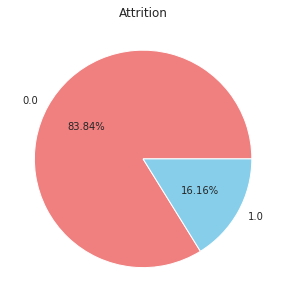

In [57]:
plt.figure(figsize=(10,5))
df['Attrition'].value_counts().plot(kind='pie',colors=['lightcoral','skyblue'],autopct='%1.2f%%')
plt.title('Attrition')
plt.ylabel('')
plt.show()

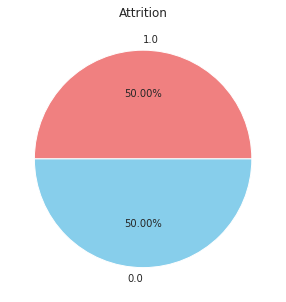

In [58]:
plt.figure(figsize=(10,5))
target.value_counts().plot(kind='pie',colors=['lightcoral','skyblue'],autopct='%1.2f%%')
plt.title('Attrition')
plt.ylabel('')
plt.show()
                                                          

Automatic Feature Selection in Python
https://hackernoon.com/automatic-feature-selection-in-python-an-essential-guide-uv3e37mk

In [59]:
pip install featurewiz

     |████████████████████████████████| 97 kB 7.6 MB/s 
     |████████████████████████████████| 136 kB 40.6 MB/s 
     |████████████████████████████████| 26.7 MB 1.4 MB/s 
     |████████████████████████████████| 192.9 MB 76 kB/s 
     |████████████████████████████████| 1.1 MB 41.4 MB/s 
     |████████████████████████████████| 837 kB 51.8 MB/s 
     |████████████████████████████████| 80 kB 12.2 MB/s 
     |████████████████████████████████| 2.0 MB 59.6 MB/s 
     |████████████████████████████████| 596 kB 79.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1
  At

In [60]:
# import packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
np.random.seed(1234)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imported version = 0.1.41.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [61]:
df[numeric_cols].head()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0  0.547619        1.0             1.0   0.716332         1.0   
1  0.738095        0.0             0.5   0.126791         0.5   
2  0.452381        1.0             1.0   0.910458         0.5   
3  0.357143        0.0             0.5   0.924069         0.5   
4  0.214286        0.0             1.0   0.350287         0.5   

   DistanceFromHome  Education  EducationField  EmployeeNumber  \
0          0.000000       0.25             0.2        0.000000   
1          0.250000       0.00             0.2        0.000484   
2          0.035714       0.25             0.8        0.001451   
3          0.071429       0.75             0.2        0.001935   
4          0.035714       0.00             0.6        0.002903   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                 0.333333     0.0    0.914286        0.666667      0.25   
1                 0.666667     1.0    0.442857        0.333333      0.25   
2                 1.000000     1.0    0.885714        0.333333      0.00   
3                 1.000000     0.0    0.371429        0.666667      0.00   
4                 0.000000     1.0    0.142857        0.666667      0.00   

   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0    0.875         1.000000            1.0       0.262814     0.698053   
1    0.750         0.333333            0.5       0.217306     0.916001   
2    0.250         0.666667            1.0       0.057003     0.012126   
3    0.750         0.666667            0.5       0.100190     0.845814   
4    0.250         0.333333            0.5       0.129667     0.583738   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0            0.888889       1.0           0.000000                0.0   
1            0.111111       0.0           0.857143                1.0   
2            0.666667       1.0           0.285714                0.0   
3            0.111111       1.0           0.000000                0.0   
4            1.000000       0.0           0.071429                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                  0.000000          0.000000           0.210526   
1                  1.000000          0.333333           0.263158   
2                  0.333333          0.000000           0.184211   
3                  0.666667          0.000000           0.210526   
4                  1.000000          0.333333           0.157895   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                    0.0         0.000000        0.162162            0.235294   
1                    0.5         0.666667        0.270270            0.411765   
2                    0.5         0.666667        0.000000            0.000000   
3                    0.5         0.666667        0.216216            0.411765   
4                    0.5         0.666667        0.054054            0.117647   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                 0.000000              0.294118  
1                 0.166667              0.411765  
2                 0.000000              0.000000  
3                 0.500000              0.000000  
4                 0.333333              0.117647

In [62]:
sampled[cols].shape

(2158, 31)

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],target,
                                                test_size=0.3,
                                                shuffle=True)

Train Accuracy : 0.80 %
Test Accuracy : 0.78 %


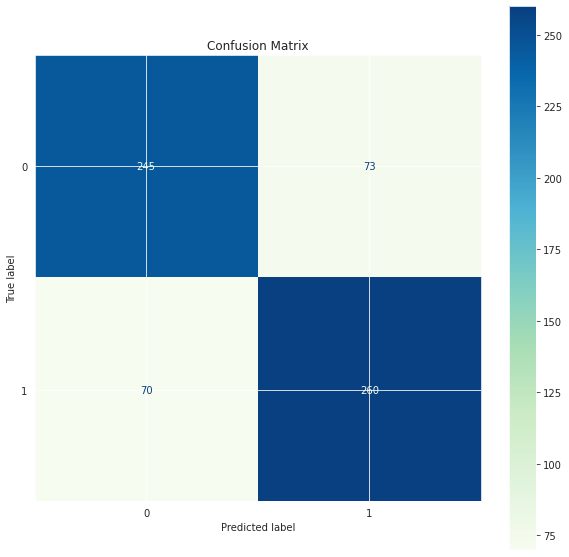

In [64]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp.plot(ax=ax,cmap='GnBu')
plt.show()

How to choose n_estimators in RandomForestClassifier?
https://stackoverflow.com/questions/60768008/how-to-choose-n-estimators-in-randomforestclassifier

Train Accuracy : 1.00 %
Test Accuracy : 0.93 %


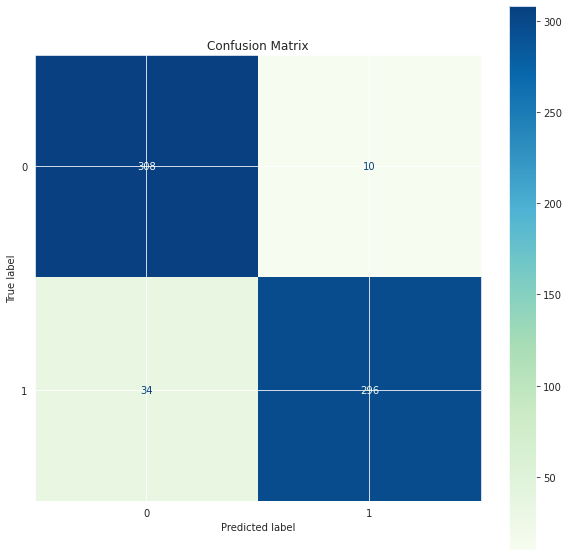

In [65]:
random_forest = RandomForestClassifier(n_estimators=666,
                                      random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp.plot(ax=ax,cmap='GnBu')
plt.show()

Train Accuracy : 1.00 %
Test Accuracy : 0.93 %


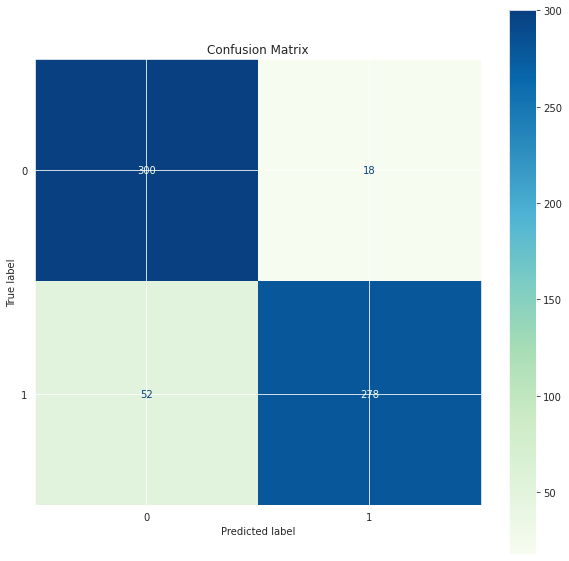

In [66]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.01,n_estimators=500,use_label_encoder=False,
                                      random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp.plot(ax=ax,cmap='GnBu')
plt.show()

In [67]:
df[numeric_cols].shape

(1287, 32)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (1287, 32)
    Loaded train data. Shape = (1287, 32)
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data 

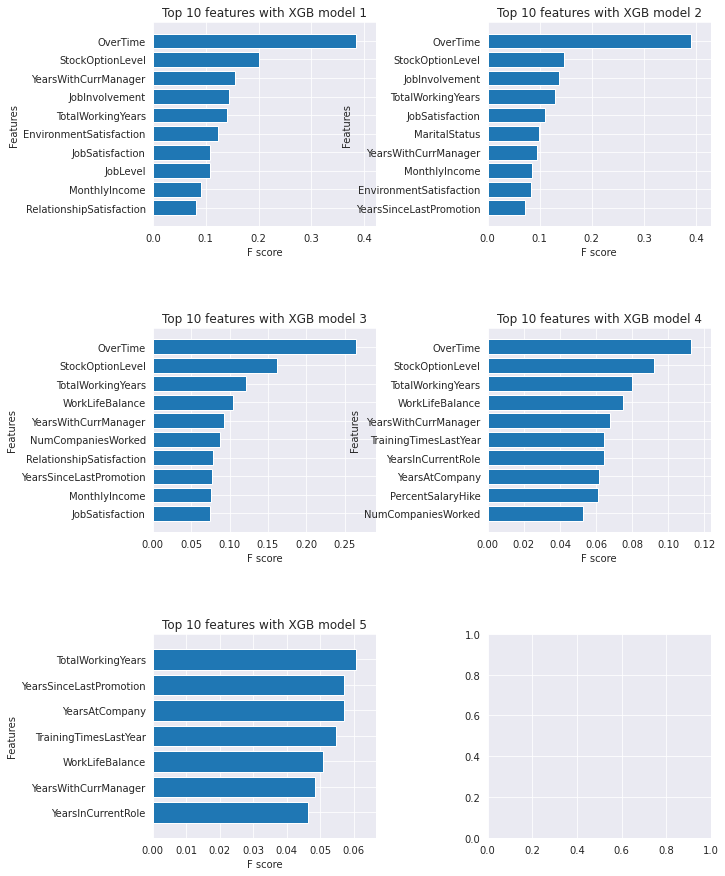

            Total time taken for XGBoost feature selection = 6 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 18 important features:
['OverTime', 'StockOptionLevel', 'YearsWithCurrManager', 'JobInvolvement', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'JobLevel', 'MonthlyIncome', 'RelationshipSatisfaction', 'MaritalStatus', 'YearsSinceLastPromotion', 'WorkLifeBalance', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsAtCompany', 'PercentSalaryHike']

    Time taken for feature selection = 6 seconds
    Reverted column names to original names given in train dataset


In [68]:
#automatic feature selection by using featurewiz package
target_new ='Attrition'
features_new, train_new = featurewiz(df[numeric_cols],target_new, corr_limit=0.7, verbose=2, sep=",", header=0, test_data="", feature_engg="",category_encoders="")

In [69]:
features_new

['OverTime',
 'StockOptionLevel',
 'YearsWithCurrManager',
 'JobInvolvement',
 'TotalWorkingYears',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'JobLevel',
 'MonthlyIncome',
 'RelationshipSatisfaction',
 'MaritalStatus',
 'YearsSinceLastPromotion',
 'WorkLifeBalance',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'YearsInCurrentRole',
 'YearsAtCompany',
 'PercentSalaryHike']

In [70]:
X_new = train_new.drop(['Attrition'],axis=1)
y = train_new.Attrition.values
# preprocessing the features
X_scaled  = MinMaxScaler().fit_transform(X_new)
#split data into train and validate 
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)
# create and train classifier 
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)
# make prediction 
preds = classifier.predict(X_test) 
# check performance
accuracy_score(preds,Y_test) 

0.8527131782945736

Train Accuracy : 1.00 %
Test Accuracy : 0.86 %


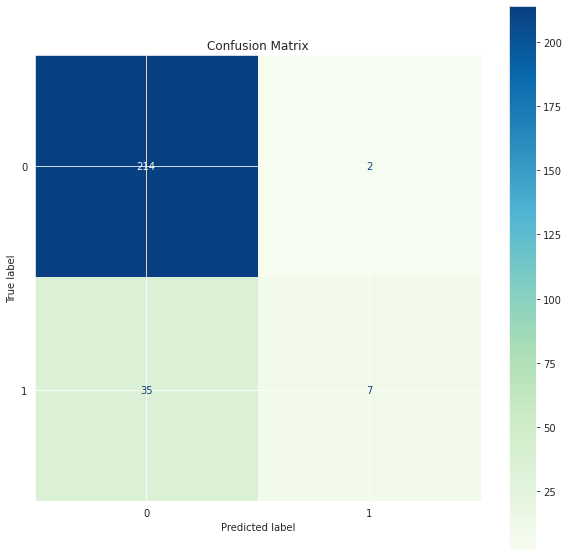

In [71]:
random_forest = RandomForestClassifier(n_estimators=666,
                                      random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp.plot(ax=ax,cmap='GnBu')
plt.show()




### Model 2

# New Section

In [1]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

!pip install xgboost
!pip install lightgbm
!pip install catboost

!pip install inflection
!pip install dython
!pip install shap

In [2]:
# basic
import pandas as pd
import numpy as np

# association between attributes
from dython.nominal import associations

# CamelCase to snake_case format
import inflection

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)
# change the display precision for better viz
pd.set_option('display.precision', 3)

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# explainable AI
import shap

### Start

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle learning/dataKaggle/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
# Reassign target
df['Attrition'] = df['Attrition'].map({"No":0,"Yes":1})

In [5]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.drop('EmployeeNumber',axis=1,inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
# numerical
column_numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()

# categorical
column_categorical = df.select_dtypes(include=['object']).columns.tolist()


data_type_general = dict()

for col in df.columns:
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

Age  Attrition BusinessTravel  DailyRate  \
general data types  numerical  numerical    categorical  numerical   

                     Department DistanceFromHome  Education EducationField  \
general data types  categorical        numerical  numerical    categorical   

                   EmployeeCount EnvironmentSatisfaction  ...  \
general data types     numerical               numerical  ...   

                   RelationshipSatisfaction StandardHours StockOptionLevel  \
general data types                numerical     numerical        numerical   

                   TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  \
general data types         numerical             numerical       numerical   

                   YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion  \
general data types      numerical          numerical               numerical   

                   YearsWithCurrManager  
general data types            numerical  

[1 rows x 34 columns]

In [10]:
column_categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [11]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [12]:
df.drop('Over18',axis=1,inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
data_count = pd.DataFrame(df.count()).T.rename({0:'total data'})
data_count

Age  Attrition  BusinessTravel  DailyRate  Department  \
total data  1470       1470            1470       1470        1470   

            DistanceFromHome  Education  EducationField  EmployeeCount  \
total data              1470       1470            1470           1470   

            EnvironmentSatisfaction  ...  RelationshipSatisfaction  \
total data                     1470  ...                      1470   

            StandardHours  StockOptionLevel  TotalWorkingYears  \
total data           1470              1470               1470   

            TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
total data                   1470             1470            1470   

            YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
total data                1470                     1470                  1470  

[1 rows x 33 columns]

In [14]:
data_null_total = pd.DataFrame(df.isna().sum()).T.rename({0:'total null'})
data_null_total

Age  Attrition  BusinessTravel  DailyRate  Department  \
total null    0          0               0          0           0   

            DistanceFromHome  Education  EducationField  EmployeeCount  \
total null                 0          0               0              0   

            EnvironmentSatisfaction  ...  RelationshipSatisfaction  \
total null                        0  ...                         0   

            StandardHours  StockOptionLevel  TotalWorkingYears  \
total null              0                 0                  0   

            TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
total null                      0                0               0   

            YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
total null                   0                        0                     0  

[1 rows x 33 columns]

In [15]:
data_null_percentage = pd.DataFrame(100*df.isna().sum()/df.shape[0]).T.rename({0:'percentage null'})
data_null_percentage

Age  Attrition  BusinessTravel  DailyRate  Department  \
percentage null  0.0        0.0             0.0        0.0         0.0   

                 DistanceFromHome  Education  EducationField  EmployeeCount  \
percentage null               0.0        0.0             0.0            0.0   

                 EnvironmentSatisfaction  ...  RelationshipSatisfaction  \
percentage null                      0.0  ...                       0.0   

                 StandardHours  StockOptionLevel  TotalWorkingYears  \
percentage null            0.0               0.0                0.0   

                 TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
percentage null                    0.0              0.0             0.0   

                 YearsInCurrentRole  YearsSinceLastPromotion  \
percentage null                 0.0                      0.0   

                 YearsWithCurrManager  
percentage null                   0.0  

[1 rows x 33 columns]

3.7.1. Numerical Data



In [16]:
variation_numerical = dict()
for col in column_numerical:
  tmp = f'{df[col].min()} - {df[col].max()}'
  variation_numerical[col] = tmp
tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

Age Attrition   DailyRate DistanceFromHome Education  \
data variation  18 - 60     0 - 1  102 - 1499           1 - 29     1 - 5   

               EmployeeCount EnvironmentSatisfaction HourlyRate  \
data variation         1 - 1                   1 - 4   30 - 100   

               JobInvolvement JobLevel  ... RelationshipSatisfaction  \
data variation          1 - 4    1 - 5  ...                    1 - 4   

               StandardHours StockOptionLevel TotalWorkingYears  \
data variation       80 - 80            0 - 3            0 - 40   

               TrainingTimesLastYear WorkLifeBalance YearsAtCompany  \
data variation                 0 - 6           1 - 4         0 - 40   

               YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager  
data variation             0 - 18                  0 - 15               0 - 17  

[1 rows x 26 columns]

In [17]:
#df.drop('StandardHours',axis=1,inplace=True)
df.drop('EmployeeCount',axis=1,inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
df.drop('StandardHours',axis=1,inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [19]:
# numerical
column_numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()

variation_numerical = dict()
for col in column_numerical:
  tmp = f'{df[col].min()} - {df[col].max()}'
  variation_numerical[col] = tmp
tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

Age Attrition   DailyRate DistanceFromHome Education  \
data variation  18 - 60     0 - 1  102 - 1499           1 - 29     1 - 5   

               EnvironmentSatisfaction HourlyRate JobInvolvement JobLevel  \
data variation                   1 - 4   30 - 100          1 - 4    1 - 5   

               JobSatisfaction  ... PerformanceRating  \
data variation           1 - 4  ...             3 - 4   

               RelationshipSatisfaction StockOptionLevel TotalWorkingYears  \
data variation                    1 - 4            0 - 3            0 - 40   

               TrainingTimesLastYear WorkLifeBalance YearsAtCompany  \
data variation                 0 - 6           1 - 4         0 - 40   

               YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager  
data variation             0 - 18                  0 - 15               0 - 17  

[1 rows x 24 columns]

In [20]:
# categorical
column_categorical = df.select_dtypes(include=['object']).columns.tolist()
variation_categorical = dict()

for col in column_categorical:
  tmp = df[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ' ,'.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

BusinessTravel  \
data variation  Non-Travel ,Travel_Frequently ,Travel_Rarely   

                                                    Department  \
data variation  Human Resources ,Research & Development ,Sales   

                                                                             EducationField  \
data variation  Human Resources ,Life Sciences ,Marketing ,Medical ,Other ,Technical Degree   

                      Gender  \
data variation  Female ,Male   

                                                                                                                                                                                         JobRole  \
data variation  Healthcare Representative ,Human Resources ,Laboratory Technician ,Manager ,Manufacturing Director ,Research Director ,Research Scientist ,Sales Executive ,Sales Representative   

                            MaritalStatus OverTime  
data variation  Divorced ,Married ,Single  No ,Yes

In [21]:
data_variation = pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=1).fillna('-')
data_variation

Age Attrition   DailyRate DistanceFromHome Education  \
range      18 - 60     0 - 1  102 - 1499           1 - 29     1 - 5   
variation        -         -           -                -         -   

          EnvironmentSatisfaction HourlyRate JobInvolvement JobLevel  \
range                       1 - 4   30 - 100          1 - 4    1 - 5   
variation                       -          -              -        -   

          JobSatisfaction  ... YearsInCurrentRole YearsSinceLastPromotion  \
range               1 - 4  ...             0 - 18                  0 - 15   
variation               -  ...                  -                       -   

          YearsWithCurrManager                                BusinessTravel  \
range                   0 - 17                                             -   
variation                    -  Non-Travel ,Travel_Frequently ,Travel_Rarely   

                                               Department  \
range                                                   -   
variation  Human Resources ,Research & Development ,Sales   

                                                                        EducationField  \
range                                                                                -   
variation  Human Resources ,Life Sciences ,Marketing ,Medical ,Other ,Technical Degree   

                 Gender  \
range                 -   
variation  Female ,Male   

                                                                                                                                                                                    JobRole  \
range                                                                                                                                                                                     -   
variation  Healthcare Representative ,Human Resources ,Laboratory Technician ,Manager ,Manufacturing Director ,Research Director ,Research Scientist ,Sales Executive ,Sales Representative   

                       MaritalStatus OverTime  
range                              -        -  
variation  Divorced ,Married ,Single  No ,Yes  

[2 rows x 31 columns]

Summary of Dataset Info

In [22]:
variation_categorical = dict()

for col in column_categorical:
  tmp = df[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

Age Attrition   DailyRate DistanceFromHome Education  \
data variation  18 - 60     0 - 1  102 - 1499           1 - 29     1 - 5   

               EnvironmentSatisfaction HourlyRate JobInvolvement JobLevel  \
data variation                   1 - 4   30 - 100          1 - 4    1 - 5   

               JobSatisfaction  ... YearsInCurrentRole  \
data variation           1 - 4  ...             0 - 18   

               YearsSinceLastPromotion YearsWithCurrManager  \
data variation                  0 - 15               0 - 17   

                                              BusinessTravel  \
data variation  Non-Travel, Travel_Frequently, Travel_Rarely   

                                                    Department  \
data variation  Human Resources, Research & Development, Sales   

                                                                             EducationField  \
data variation  Human Resources, Life Sciences, Marketing, Medical, Other, Technical Degree   

                      Gender  \
data variation  Female, Male   

                                                                                                                                                                                         JobRole  \
data variation  Healthcare Representative, Human Resources, Laboratory Technician, Manager, Manufacturing Director, Research Director, Research Scientist, Sales Executive, Sales Representative   

                            MaritalStatus OverTime  
data variation  Divorced, Married, Single  No, Yes  

[1 rows x 31 columns]

In [23]:

data_info = pd.concat([data_type_general ,
                       data_count, data_null_total,
                       data_null_percentage.round(2),data_variation],
                      axis=0)

data_info = data_info.reindex(df.columns, axis=1)
data_info

Age  Attrition  \
general data types  numerical  numerical   
total data               1470       1470   
total null                  0          0   
percentage null           0.0        0.0   
data variation        18 - 60      0 - 1   

                                                  BusinessTravel   DailyRate  \
general data types                                   categorical   numerical   
total data                                                  1470        1470   
total null                                                     0           0   
percentage null                                              0.0         0.0   
data variation      Non-Travel, Travel_Frequently, Travel_Rarely  102 - 1499   

                                                        Department  \
general data types                                     categorical   
total data                                                    1470   
total null                                                       0   
percentage null                                                0.0   
data variation      Human Resources, Research & Development, Sales   

                   DistanceFromHome  Education  \
general data types        numerical  numerical   
total data                     1470       1470   
total null                        0          0   
percentage null                 0.0        0.0   
data variation               1 - 29      1 - 5   

                                                                                 EducationField  \
general data types                                                                  categorical   
total data                                                                                 1470   
total null                                                                                    0   
percentage null                                                                             0.0   
data variation      Human Resources, Life Sciences, Marketing, Medical, Other, Technical Degree   

                   EnvironmentSatisfaction        Gender  ...  \
general data types               numerical   categorical  ...   
total data                            1470          1470  ...   
total null                               0             0  ...   
percentage null                        0.0           0.0  ...   
data variation                       1 - 4  Female, Male  ...   

                   PerformanceRating RelationshipSatisfaction  \
general data types         numerical                numerical   
total data                      1470                     1470   
total null                         0                        0   
percentage null                  0.0                      0.0   
data variation                 3 - 4                    1 - 4   

                   StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
general data types        numerical         numerical             numerical   
total data                     1470              1470                  1470   
total null                        0                 0                     0   
percentage null                 0.0               0.0                   0.0   
data variation                0 - 3            0 - 40                 0 - 6   

                   WorkLifeBalance YearsAtCompany YearsInCurrentRole  \
general data types       numerical      numerical          numerical   
total data                    1470           1470               1470   
total null                       0              0                  0   
percentage null                0.0            0.0                0.0   
data variation               1 - 4         0 - 40             0 - 18   

                   YearsSinceLastPromotion YearsWithCurrManager  
general data types               numerical            numerical  
total data                            1470                 1470  
total null                               0                    0  
percentag

In [24]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Visualization Function

In [25]:
data_viz = df.copy()
data_viz.loc[:,'Attrition'] = data_viz.loc[:, 'Attrition'].apply(lambda x: 'Attrition' if x == 1 else 'retain')

In [26]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['retain', 'Attrition'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('Attrition', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('Attrition', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Customer Attrition Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

Target Distribution

In [27]:
pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dython 0.7.1.post3 requires matplotlib>=3.4.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


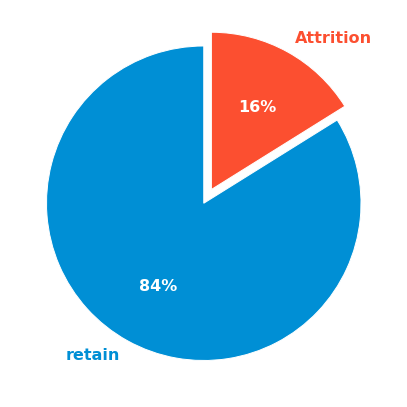

In [28]:
pie_data = data_viz['Attrition'].value_counts(normalize=True).values * 100
pie_label = data_viz['Attrition'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

As we can see, 16% of attrition. Technically speaking, this dataset is an imbalanced dataset.

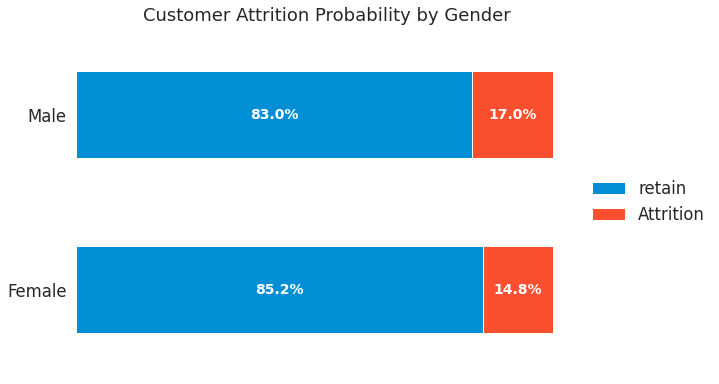

In [29]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='Gender', y='Attrition', ax=ax)

In [30]:
columns = data_viz['Attrition']

attr_crosstab = pd.DataFrame()

for col in column_categorical:  #column_categorical
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Attrition', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

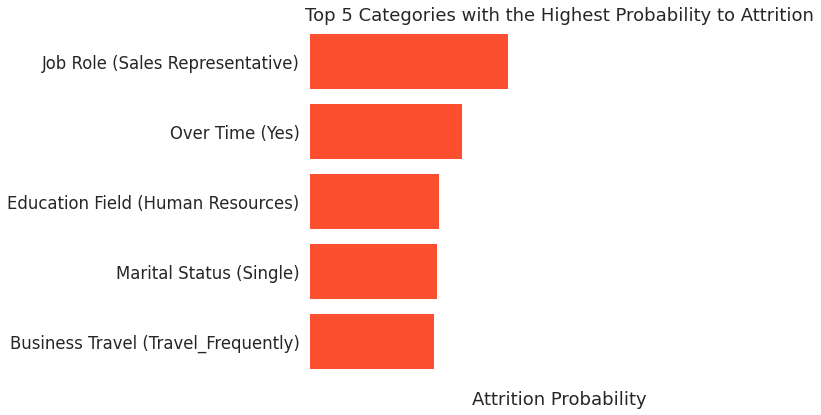

In [31]:
k='Attrition'
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[:5], x=k, y='attribute', ax=ax, palette=['#FC4F30'], saturation=1)

#ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Attrition')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Attrition Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

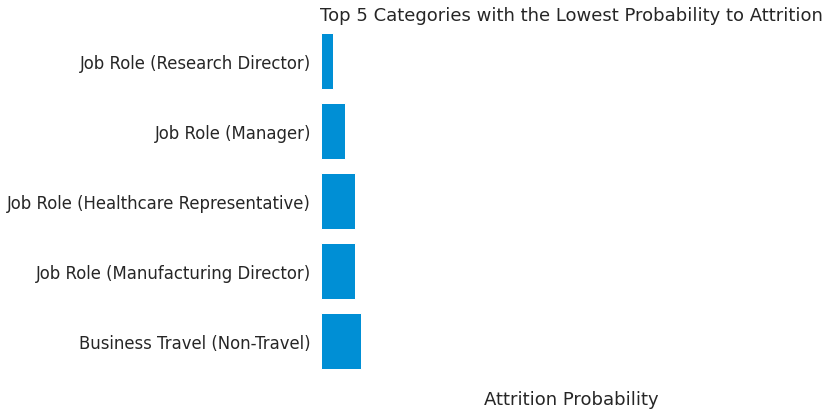

In [32]:
k='Attrition'
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values(k), x=k, y='attribute', ax=ax, palette=['#008FD5'], saturation=1)

#ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Attrition')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Attrition Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

In [33]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [34]:
df[['TotalWorkingYears', 'TrainingTimesLastYear',
        'YearsAtCompany']]

TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany
0                     8                      0               6
1                    10                      3              10
2                     7                      3               0
3                     8                      3               8
4                     6                      3               2
...                 ...                    ...             ...
1465                 17                      3               5
1466                  9                      5               7
1467                  6                      0               6
1468                 17                      3               9
1469                  6                      3               4

[1470 rows x 3 columns]

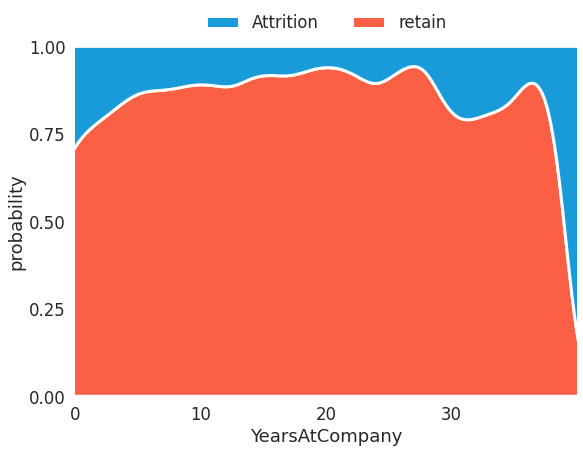

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='YearsAtCompany', hue='Attrition', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['YearsAtCompany'].max(),10))
ax.set_xlim(data_viz['YearsAtCompany'].min(),data_viz['YearsAtCompany'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

# ax.axis('tight')

In [36]:
data_info.T

general data types total data total null  \
Age                               numerical       1470          0   
Attrition                         numerical       1470          0   
BusinessTravel                  categorical       1470          0   
DailyRate                         numerical       1470          0   
Department                      categorical       1470          0   
DistanceFromHome                  numerical       1470          0   
Education                         numerical       1470          0   
EducationField                  categorical       1470          0   
EnvironmentSatisfaction           numerical       1470          0   
Gender                          categorical       1470          0   
HourlyRate                        numerical       1470          0   
JobInvolvement                    numerical       1470          0   
JobLevel                          numerical       1470          0   
JobRole                         categorical       1470          0   
JobSatisfaction                   numerical       1470          0   
MaritalStatus                   categorical       1470          0   
MonthlyIncome                     numerical       1470          0   
MonthlyRate                       numerical       1470          0   
NumCompaniesWorked                numerical       1470          0   
OverTime                        categorical       1470          0   
PercentSalaryHike                 numerical       1470          0   
PerformanceRating                 numerical       1470          0   
RelationshipSatisfaction          numerical       1470          0   
StockOptionLevel                  numerical       1470          0   
TotalWorkingYears                 numerical       1470          0   
TrainingTimesLastYear             numerical       1470          0   
WorkLifeBalance                   numerical       1470          0   
YearsAtCompany                    numerical       1470          0   
YearsInCurrentRole                numerical       1470          0   
YearsSinceLastPromotion           numerical       1470          0   
YearsWithCurrManager              numerical       1470          0   

                         percentage null  \
Age                                  0.0   
Attrition                            0.0   
BusinessTravel                       0.0   
DailyRate                            0.0   
Department                           0.0   
DistanceFromHome                     0.0   
Education                            0.0   
EducationField                       0.0   
EnvironmentSatisfaction              0.0   
Gender                               0.0   
HourlyRate                           0.0   
JobInvolvement                       0.0   
JobLevel                             0.0   
JobRole                              0.0   
JobSatisfaction                      0.0   
MaritalStatus                        0.0   
MonthlyIncome                        0.0   
MonthlyRate                          0.0   
NumCompaniesWorked                   0.0   
OverTime                             0.0   
PercentSalaryHike                    0.0   
PerformanceRating                    0.0   
RelationshipSatisfaction             0.0   
StockOptionLevel                     0.0   
TotalWorkingYears                    0.0   
TrainingTimesLastYear                0.0   
WorkLifeBalance                      0.0   
YearsAtCompany                       0.0   
YearsInCurrentRole                   0.0   
YearsSinceLastPromotion              0.0   
YearsWithCurrManager                 0.0   

                                                                                                                                                                                            data variation  
Age                                                                                                                                                                                                18 - 60

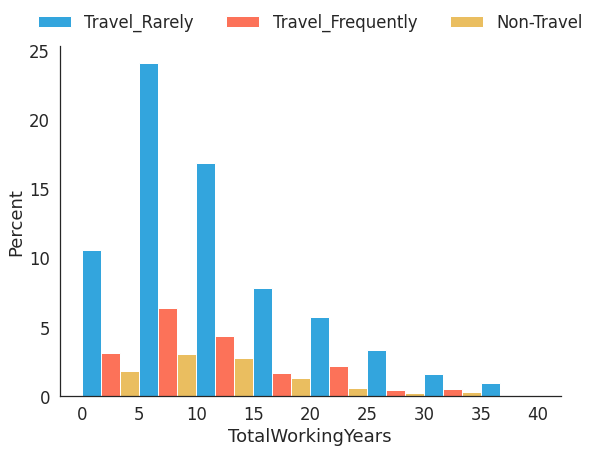

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=data_viz, x='TotalWorkingYears', hue='BusinessTravel', stat='percent', multiple='dodge', ax=ax, binwidth=5, alpha=0.8)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()  
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Age', ylabel='Density'>

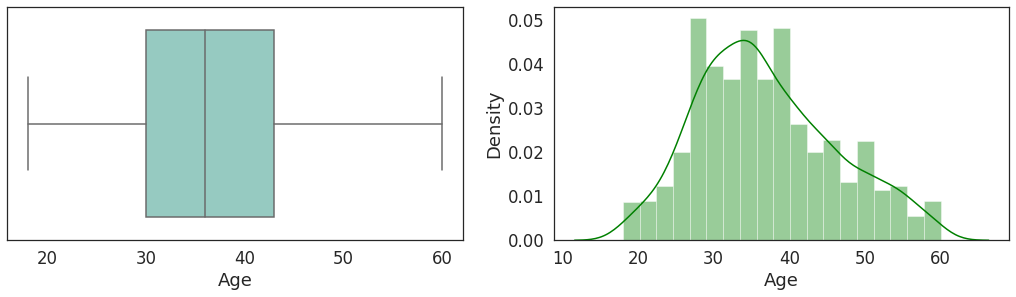

In [38]:
fig,axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3",x=df['Age'])
sns.distplot(ax=axes[1],color="Green",a=df['Age'])

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Age', ylabel='Density'>

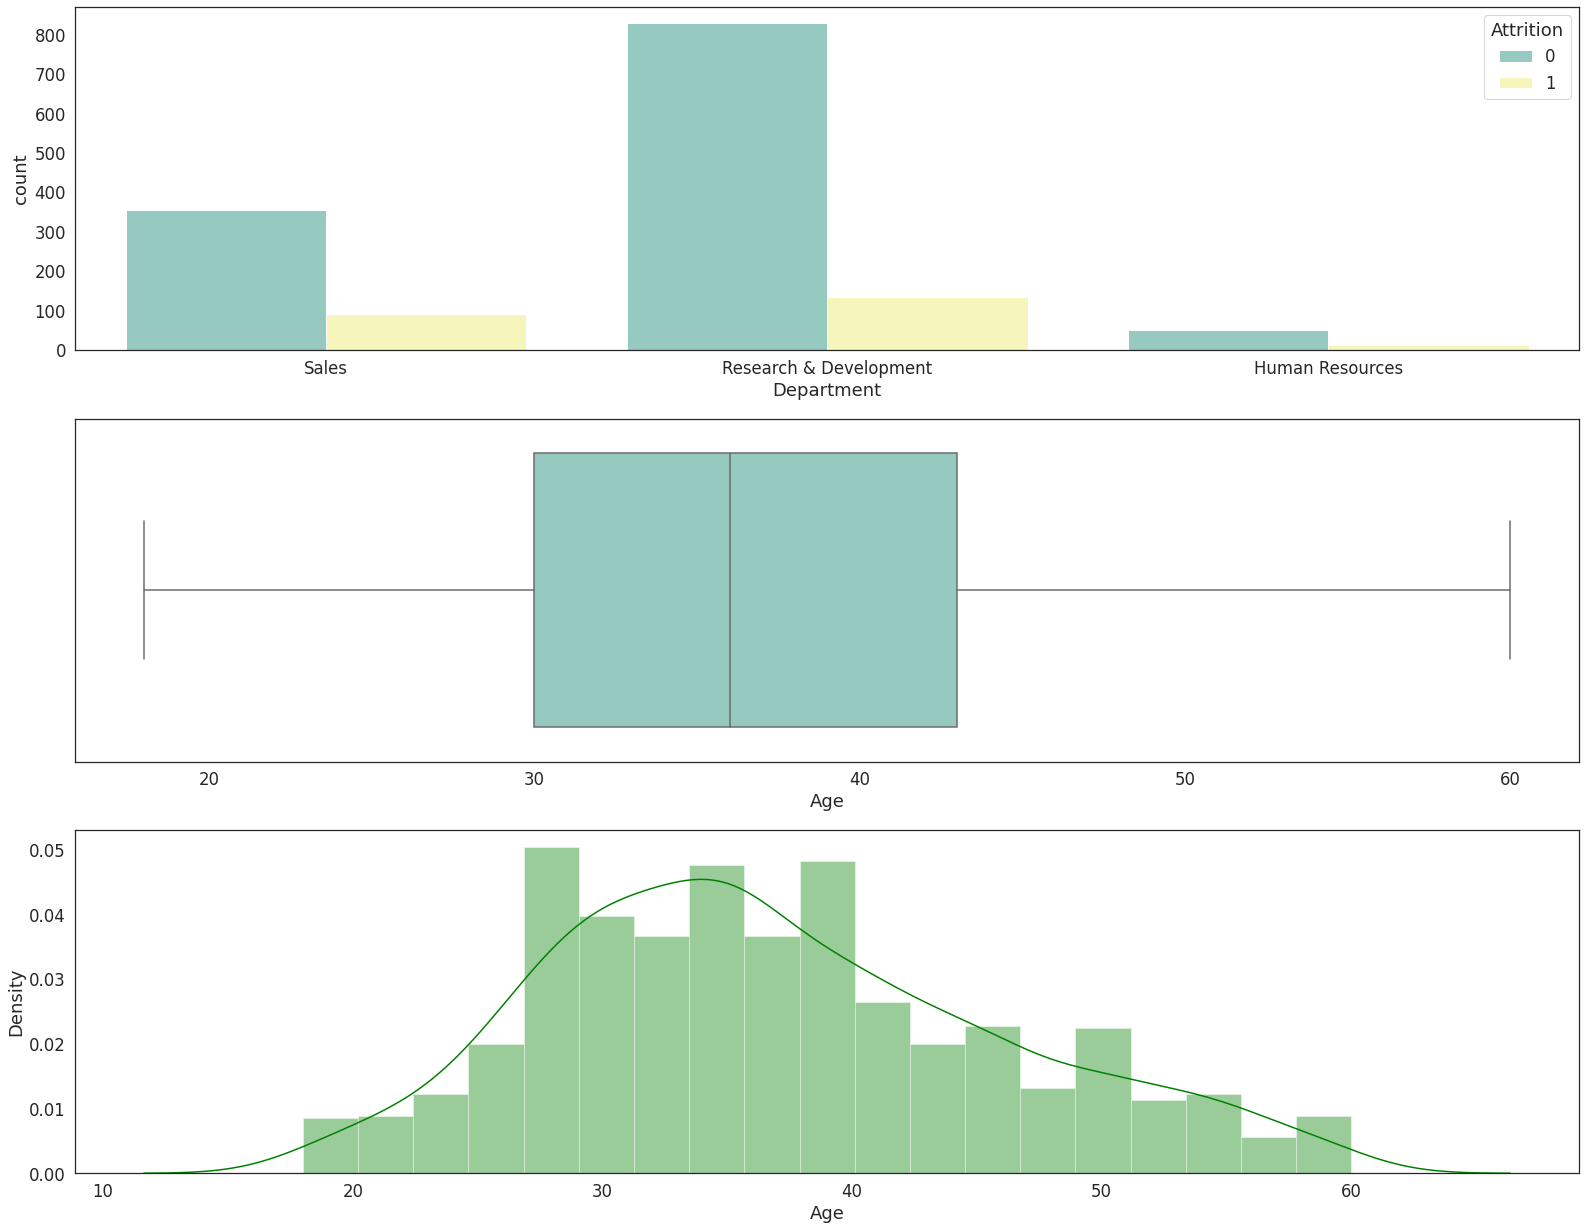

In [39]:
fig,axes = plt.subplots(3,1,figsize=(24,20))
sns.countplot(ax=axes[0],x='Department',hue='Attrition',palette="Set3",data=df)
sns.boxplot(ax=axes[1],palette="Set3",x=df['Age'])
sns.distplot(ax=axes[2],color="Green",a=df['Age'])


In [40]:
pip install matplotlib==3.5.2

  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [41]:
data_viz1 = data_viz
numeric_cols1 = data_viz1.select_dtypes(include=['int64']).columns.tolist()
data_viz1[numeric_cols1]=data_viz1[numeric_cols1].astype(np.float64)
# categorical
column_categorical1 = data_viz1.select_dtypes(include=['object']).columns.tolist()

In [42]:
# calculate the associations (correlation) between features
associations_out = associations(data_viz1,
                                nominal_columns=column_categorical1,
                                numerical_columns=numeric_cols1,
                                nom_nom_assoc='cramer',
                                compute_only=True)

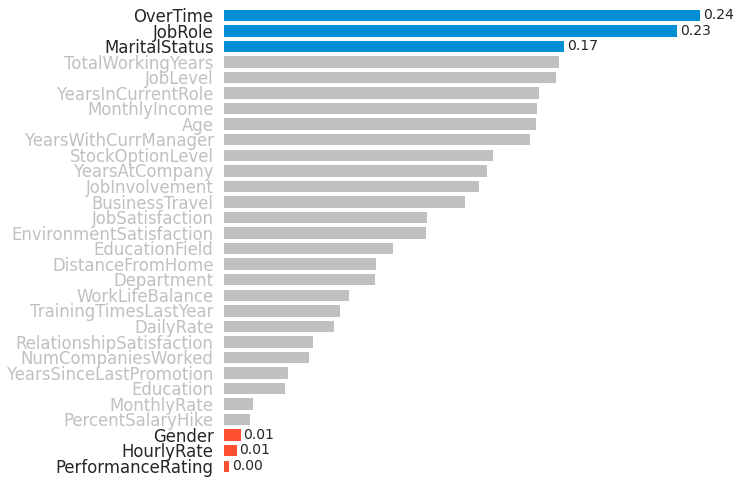

In [43]:
# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['Attrition'].drop('Attrition').sort_values(ascending=False)

# custom palette top 3
threshold_top = 3
threshold_bot = corr_target.size - 3 - 1
palette = []
for i in range(0, len(corr_target)):
  if i < threshold_top:
    palette.append('#008FD5') # blue
  elif i > threshold_bot:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette, saturation=1)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if (i >= threshold_top) and (i <= threshold_bot):
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top 3 an bottom 3
  np.put(labels, np.arange(3,labels_len-3), [-1])
  
  # hide the labels for non-top 3 and non-bottom 3
  labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

 Train - Test Split

I use a 70% : 30% ratio for the training set and testing set respectively.

In [44]:
data_X = df.drop('Attrition', axis=1)
data_y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

In [45]:
print('X shape\t\t:', data_X.shape)
print('y shape\t\t:', data_y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (1470, 30)
y shape		: (1470,)

X_train shape	: (1029, 30)
y_train shape	: (1029,)

X_test shape	: (441, 30)
y_test shape	: (441,)


Label Encoding

I use it for the target variable (label).

In [46]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [47]:
le.classes_

array([0, 1])

In [48]:
print(y_train[:5].values)
print(y_train_encode[:5])

[0 0 0 0 0]
[0 0 0 0 0]


One Hot Encoding
I use one-hot encoding for input variables (attributes or features) because each feature has no natural ordering.

I'm dropping 1 category if the feature only has 2 categories. I do this to avoid multicollinearities and redundant columns.

In [49]:
# drop 1 category if the feature only has 2 categories
ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(X_train[column_categorical])

X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

In [50]:
X_train_ohe

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

Encoded Dataframe
I will combine the encoded features and the numerical features. Make sure that the index is the same.

In [51]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'], dtype=object)

In [52]:
X_train.head()

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1073   28  Travel_Rarely       1083  Research & Development                29   
1105   33  Travel_Rarely       1242                   Sales                 8   
538    41  Travel_Rarely        314         Human Resources                 1   
1300   34  Travel_Rarely        810                   Sales                 8   
1382   31     Non-Travel        976  Research & Development                 3   

      Education    EducationField  EnvironmentSatisfaction Gender  HourlyRate  \
1073          1     Life Sciences                        3   Male          96   
1105          4     Life Sciences                        1   Male          46   
538           3   Human Resources                        4   Male          59   
1300          2  Technical Degree                        2   Male          92   
1382          2           Medical                        3   Male          48   

      ...  PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
1073  ...                  3                         2                2   
1105  ...                  3                         4                1   
538   ...                  3                         2                1   
1300  ...                  4                         3                2   
1382  ...                  3                         4                1   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
1073                  8                     2                2   
1105                  8                     6                1   
538                  22                     3                3   
1300                 10                     5                3   
1382                  4                     3                4   

      YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
1073               8                   6                       1   
1105               2                   2                       2   
538               22                   7                       2   
1300              10                   8                       4   
1382               4                   2                       2   

      YearsWithCurrManager  
1073                     7  
1105                     2  
538                     10  
1300                     8  
1382                     3  

[5 rows x 30 columns]

In [53]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe,columns = column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1073   28       1083                29          1                        3   
1105   33       1242                 8          4                        1   
538    41        314                 1          3                        4   
1300   34        810                 8          2                        2   
1382   31        976                 3          2                        3   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1073          96               1         2                2           6549   
1105          46               3         2                1           6392   
538           59               2         5                3          19189   
1300          92               4         2                3           6799   
1382          48               3         1                1           3065   

      ...  JobRole_Manager  JobRole_Manufacturing Director  \
1073  ...              0.0                             1.0   
1105  ...              0.0                             0.0   
538   ...              1.0                             0.0   
1300  ...              0.0                             0.0   
1382  ...              0.0                             0.0   

      JobRole_Research Director  JobRole_Research Scientist  \
1073                        0.0                         0.0   
1105                        0.0                         0.0   
538                         0.0                         0.0   
1300                        0.0                         0.0   
1382                        0.0                         1.0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
1073                      0.0                           0.0   
1105                      1.0                           0.0   
538                       0.0                           0.0   
1300                      1.0                           0.0   
1382                      0.0                           0.0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
1073                     0.0                    1.0                   0.0   
1105                     0.0                    1.0                   0.0   
538                      0.0                    1.0                   0.0   
1300                     0.0                    1.0                   0.0   
1382                     1.0                    0.0                   0.0   

      OverTime_Yes  
1073           0.0  
1105           0.0  
538            0.0  
1300           0.0  
1382           1.0  

[5 rows x 49 columns]

In [54]:
X_test.head()

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
687    36  Travel_Rarely        938  Research & Development                 2   
289    28  Travel_Rarely       1117  Research & Development                 8   
481    34  Travel_Rarely        254  Research & Development                 1   
1096   40  Travel_Rarely        898         Human Resources                 6   
178    46  Travel_Rarely        526                   Sales                 1   

      Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
687           4        Medical                        3    Male          79   
289           2  Life Sciences                        4  Female          66   
481           2  Life Sciences                        2    Male          83   
1096          2        Medical                        3    Male          38   
178           2      Marketing                        2  Female          92   

      ...  PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
687   ...                  4                         3                0   
289   ...                  4                         4                0   
481   ...                  3                         4                1   
1096  ...                  4                         4                0   
178   ...                  4                         3                3   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
687                  16                     6                3   
289                   5                     3                3   
481                   6                     3                3   
1096                 21                     2                3   
178                  24                     2                3   

      YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
687               11                   8                       3   
289                5                   3                       0   
481                6                   5                       1   
1096              21                   7                       7   
178               24                  13                      15   

      YearsWithCurrManager  
687                      9  
289                      2  
481                      3  
1096                     7  
178                      7  

[5 rows x 30 columns]

In [55]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe,columns = column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.head()


Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
687    36        938                 2          4                        3   
289    28       1117                 8          2                        4   
481    34        254                 1          2                        2   
1096   40        898                 6          2                        3   
178    46        526                 1          2                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
687           79               3         1                3           2519   
289           66               3         1                4           3310   
481           83               2         1                4           3622   
1096          38               3         4                4          16437   
178           92               3         3                1          10453   

      ...  JobRole_Manager  JobRole_Manufacturing Director  \
687   ...              0.0                             0.0   
289   ...              0.0                             0.0   
481   ...              0.0                             0.0   
1096  ...              1.0                             0.0   
178   ...              0.0                             0.0   

      JobRole_Research Director  JobRole_Research Scientist  \
687                         0.0                         0.0   
289                         0.0                         1.0   
481                         0.0                         1.0   
1096                        0.0                         0.0   
178                         0.0                         0.0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
687                       0.0                           0.0   
289                       0.0                           0.0   
481                       0.0                           0.0   
1096                      0.0                           0.0   
178                       1.0                           0.0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
687                      0.0                    0.0                   1.0   
289                      0.0                    0.0                   1.0   
481                      0.0                    1.0                   0.0   
1096                     0.0                    0.0                   1.0   
178                      1.0                    0.0                   0.0   

      OverTime_Yes  
687            0.0  
289            0.0  
481            1.0  
1096           1.0  
178            0.0  

[5 rows x 49 columns]

Encoded Dataframe

In [56]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode,X_test_encode],axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='Attrition', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='Attrition', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_encode['Attrition_1'].fillna(data_encode['Attrition_2'], inplace=True)
data_encode.drop(columns='Attrition_2', inplace=True)
data_encode.rename(columns={'Attrition_1':'Attrition'}, inplace=True)

In [57]:
data_encode.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1073   28       1083                29          1                        3   
1105   33       1242                 8          4                        1   
538    41        314                 1          3                        4   
1300   34        810                 8          2                        2   
1382   31        976                 3          2                        3   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1073          96               1         2                2           6549   
1105          46               3         2                1           6392   
538           59               2         5                3          19189   
1300          92               4         2                3           6799   
1382          48               3         1                1           3065   

      ...  JobRole_Manufacturing Director  JobRole_Research Director  \
1073  ...                             1.0                        0.0   
1105  ...                             0.0                        0.0   
538   ...                             0.0                        0.0   
1300  ...                             0.0                        0.0   
1382  ...                             0.0                        0.0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
1073                         0.0                      0.0   
1105                         0.0                      1.0   
538                          0.0                      0.0   
1300                         0.0                      1.0   
1382                         1.0                      0.0   

      JobRole_Sales Representative  MaritalStatus_Divorced  \
1073                           0.0                     0.0   
1105                           0.0                     0.0   
538                            0.0                     0.0   
1300                           0.0                     0.0   
1382                           0.0                     1.0   

      MaritalStatus_Married  MaritalStatus_Single  OverTime_Yes  Attrition  
1073                    1.0                   0.0           0.0        0.0  
1105                    1.0                   0.0           0.0        0.0  
538                     1.0                   0.0           0.0        0.0  
1300                    1.0                   0.0           0.0        0.0  
1382                    0.0                   0.0           1.0        0.0  

[5 rows x 50 columns]

Feature Scaling
Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features.

In [58]:
# numerical
df1 = df
df1.drop('Attrition',axis=1,inplace=True)
column_numerical1 = df1.select_dtypes(include=['int64','float64']).columns.tolist()

In [59]:
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical1:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

Scaled Dataframe
This dataframe has been encoded and scaled

In [60]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='Attrition', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='Attrition', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['Attrition_1'].fillna(data_scale['Attrition_2'], inplace=True)
data_scale.drop(columns='Attrition_2', inplace=True)
data_scale.rename(columns={'Attrition_1':'Attrition'}, inplace=True)

data_scale.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1073  0.238      0.704             1.000       0.00                    0.667   
1105  0.357      0.818             0.250       0.75                    0.000   
538   0.548      0.152             0.000       0.50                    1.000   
1300  0.381      0.508             0.250       0.25                    0.333   
1382  0.310      0.627             0.071       0.25                    0.667   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1073       0.943           0.000      0.25            0.333          0.290   
1105       0.229           0.667      0.25            0.000          0.282   
538        0.414           0.333      1.00            0.667          0.957   
1300       0.886           1.000      0.25            0.667          0.303   
1382       0.257           0.667      0.00            0.000          0.106   

      ...  JobRole_Manufacturing Director  JobRole_Research Director  \
1073  ...                             1.0                        0.0   
1105  ...                             0.0                        0.0   
538   ...                             0.0                        0.0   
1300  ...                             0.0                        0.0   
1382  ...                             0.0                        0.0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
1073                         0.0                      0.0   
1105                         0.0                      1.0   
538                          0.0                      0.0   
1300                         0.0                      1.0   
1382                         1.0                      0.0   

      JobRole_Sales Representative  MaritalStatus_Divorced  \
1073                           0.0                     0.0   
1105                           0.0                     0.0   
538                            0.0                     0.0   
1300                           0.0                     0.0   
1382                           0.0                     1.0   

      MaritalStatus_Married  MaritalStatus_Single  OverTime_Yes  Attrition  
1073                    1.0                   0.0           0.0        0.0  
1105                    1.0                   0.0           0.0        0.0  
538                     1.0                   0.0           0.0        0.0  
1300                    1.0                   0.0           0.0        0.0  
1382                    0.0                   0.0           1.0        0.0  

[5 rows x 50 columns]

In [61]:
data_scale_train = pd.concat([X_train_scale, pd.Series(y_train_encode, name='Attrition', index=X_train_scale.index)], axis=1)
data_scale_train.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1073  0.238      0.704             1.000       0.00                    0.667   
1105  0.357      0.818             0.250       0.75                    0.000   
538   0.548      0.152             0.000       0.50                    1.000   
1300  0.381      0.508             0.250       0.25                    0.333   
1382  0.310      0.627             0.071       0.25                    0.667   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1073       0.943           0.000      0.25            0.333          0.290   
1105       0.229           0.667      0.25            0.000          0.282   
538        0.414           0.333      1.00            0.667          0.957   
1300       0.886           1.000      0.25            0.667          0.303   
1382       0.257           0.667      0.00            0.000          0.106   

      ...  JobRole_Manufacturing Director  JobRole_Research Director  \
1073  ...                             1.0                        0.0   
1105  ...                             0.0                        0.0   
538   ...                             0.0                        0.0   
1300  ...                             0.0                        0.0   
1382  ...                             0.0                        0.0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
1073                         0.0                      0.0   
1105                         0.0                      1.0   
538                          0.0                      0.0   
1300                         0.0                      1.0   
1382                         1.0                      0.0   

      JobRole_Sales Representative  MaritalStatus_Divorced  \
1073                           0.0                     0.0   
1105                           0.0                     0.0   
538                            0.0                     0.0   
1300                           0.0                     0.0   
1382                           0.0                     1.0   

      MaritalStatus_Married  MaritalStatus_Single  OverTime_Yes  Attrition  
1073                    1.0                   0.0           0.0          0  
1105                    1.0                   0.0           0.0          0  
538                     1.0                   0.0           0.0          0  
1300                    1.0                   0.0           0.0          0  
1382                    0.0                   0.0           1.0          0  

[5 rows x 50 columns]

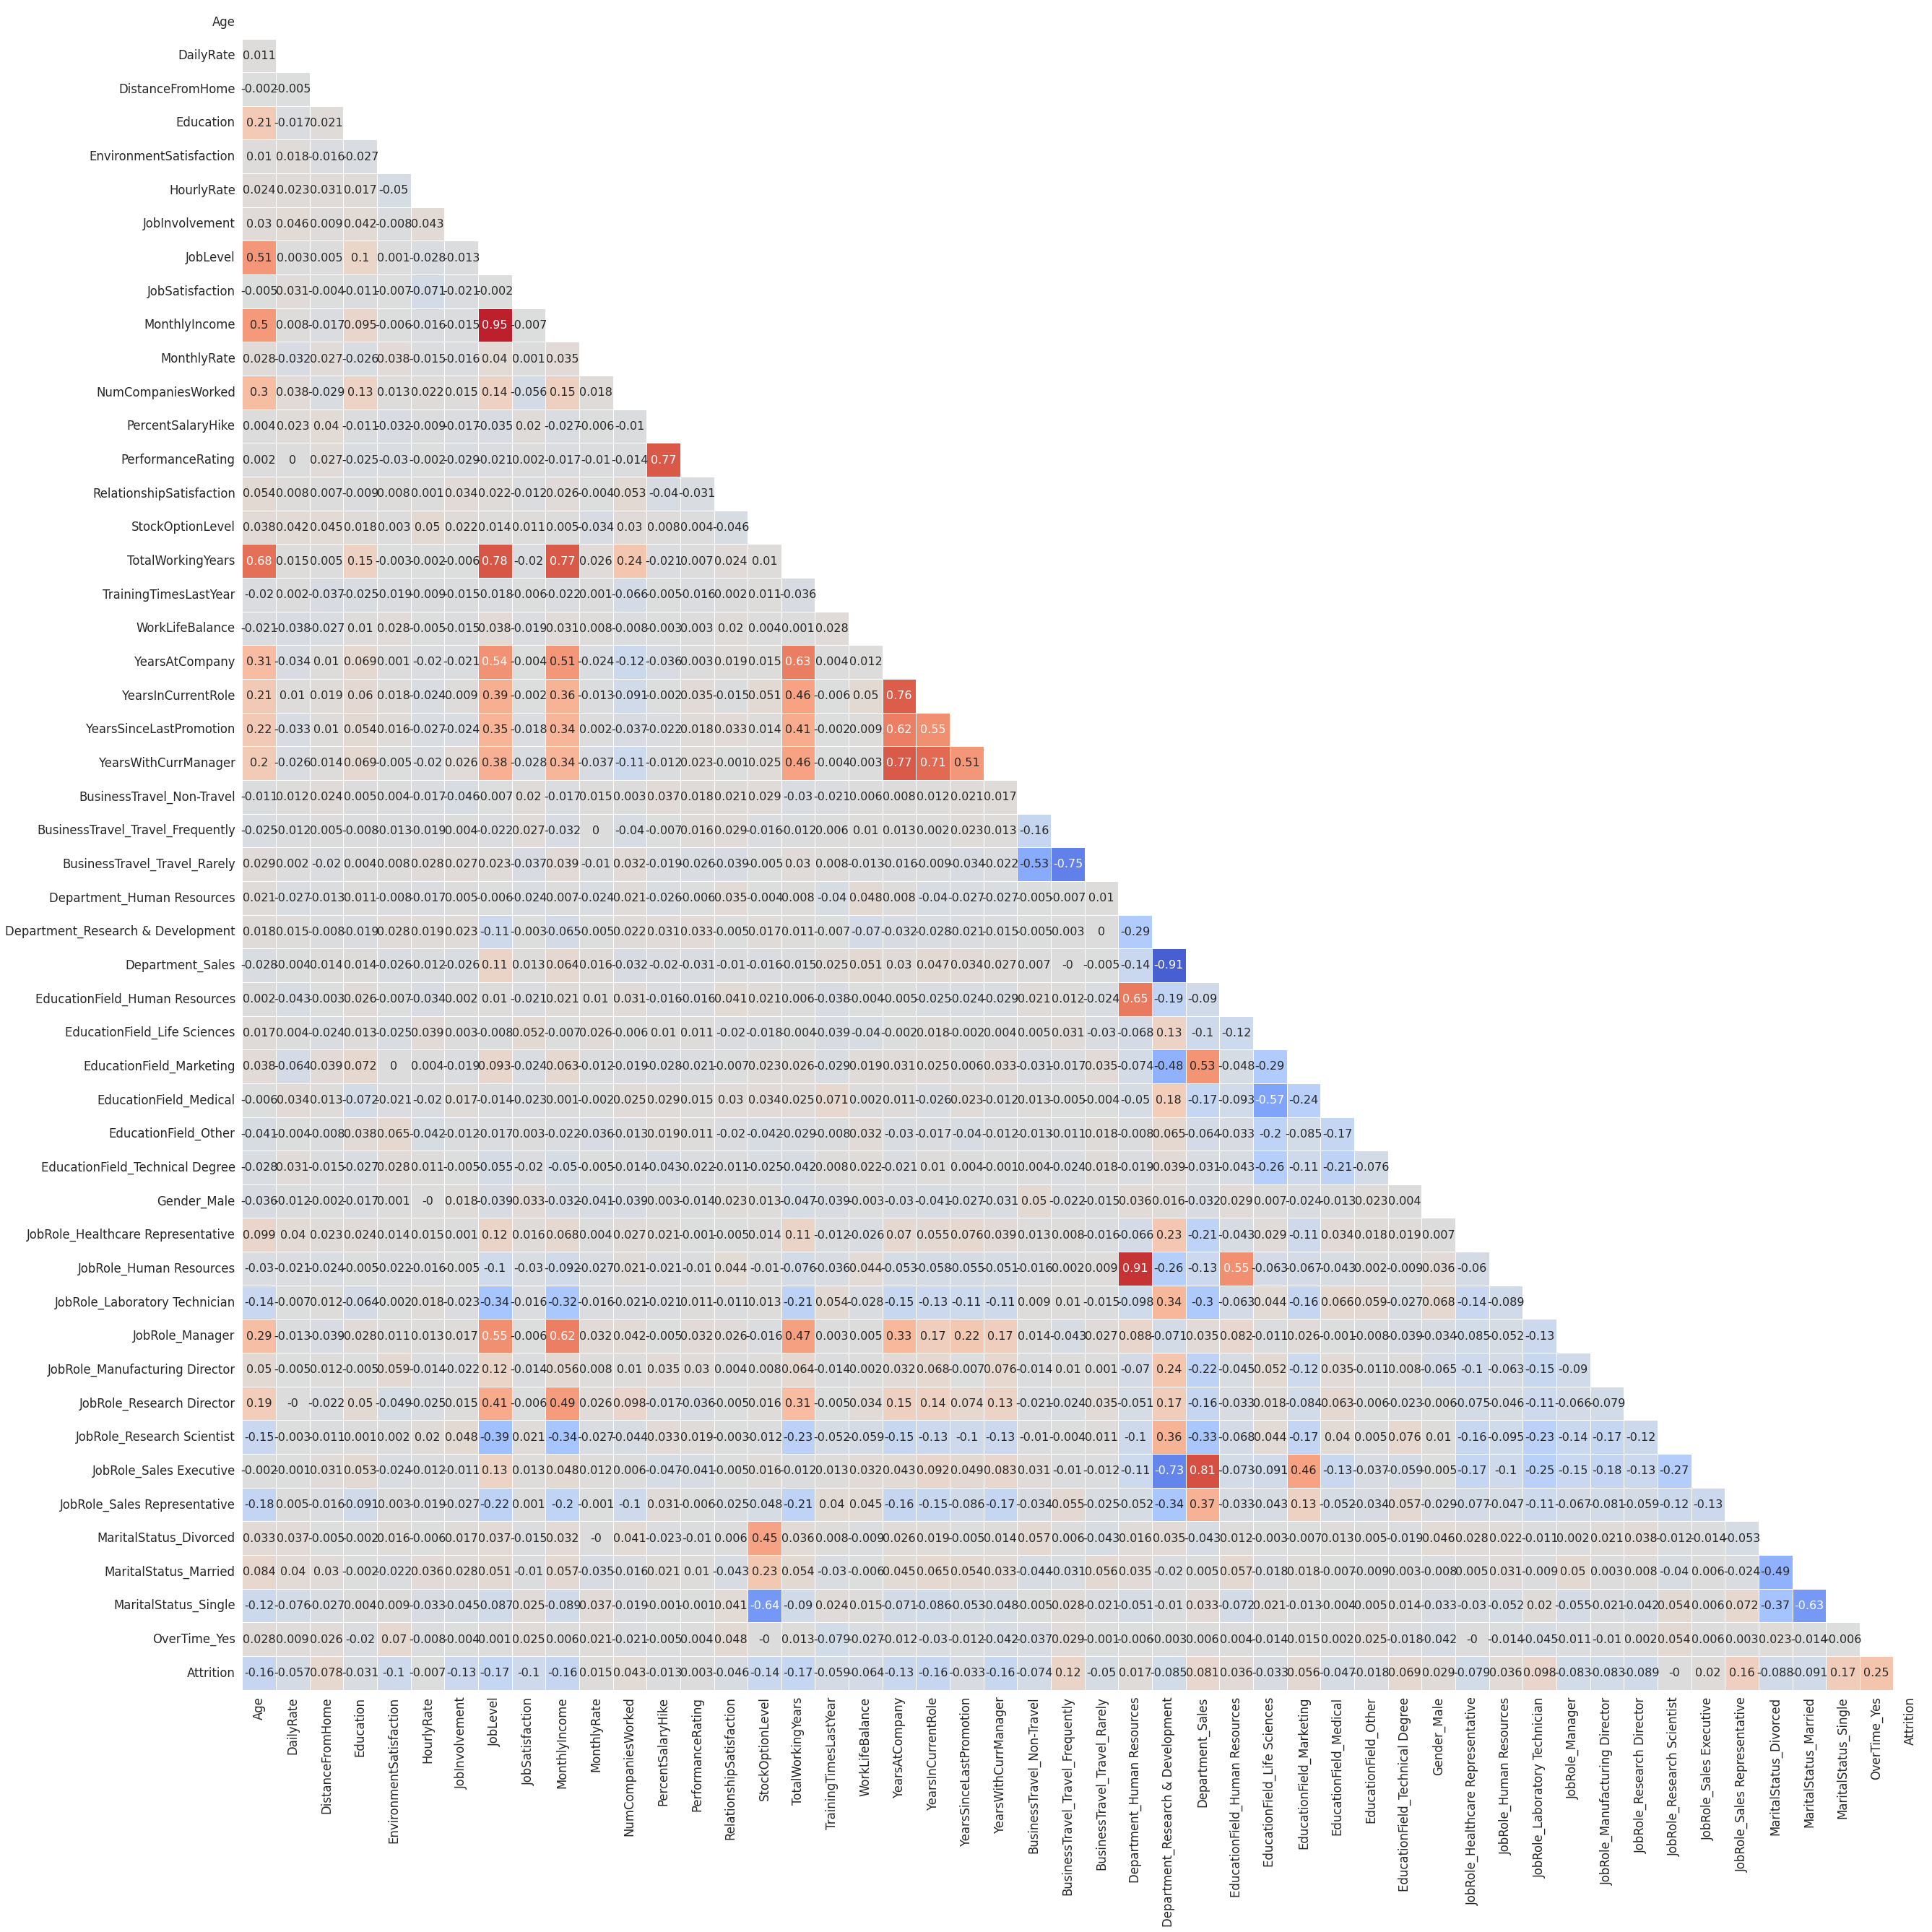

In [62]:
corr_matrix = data_scale.corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

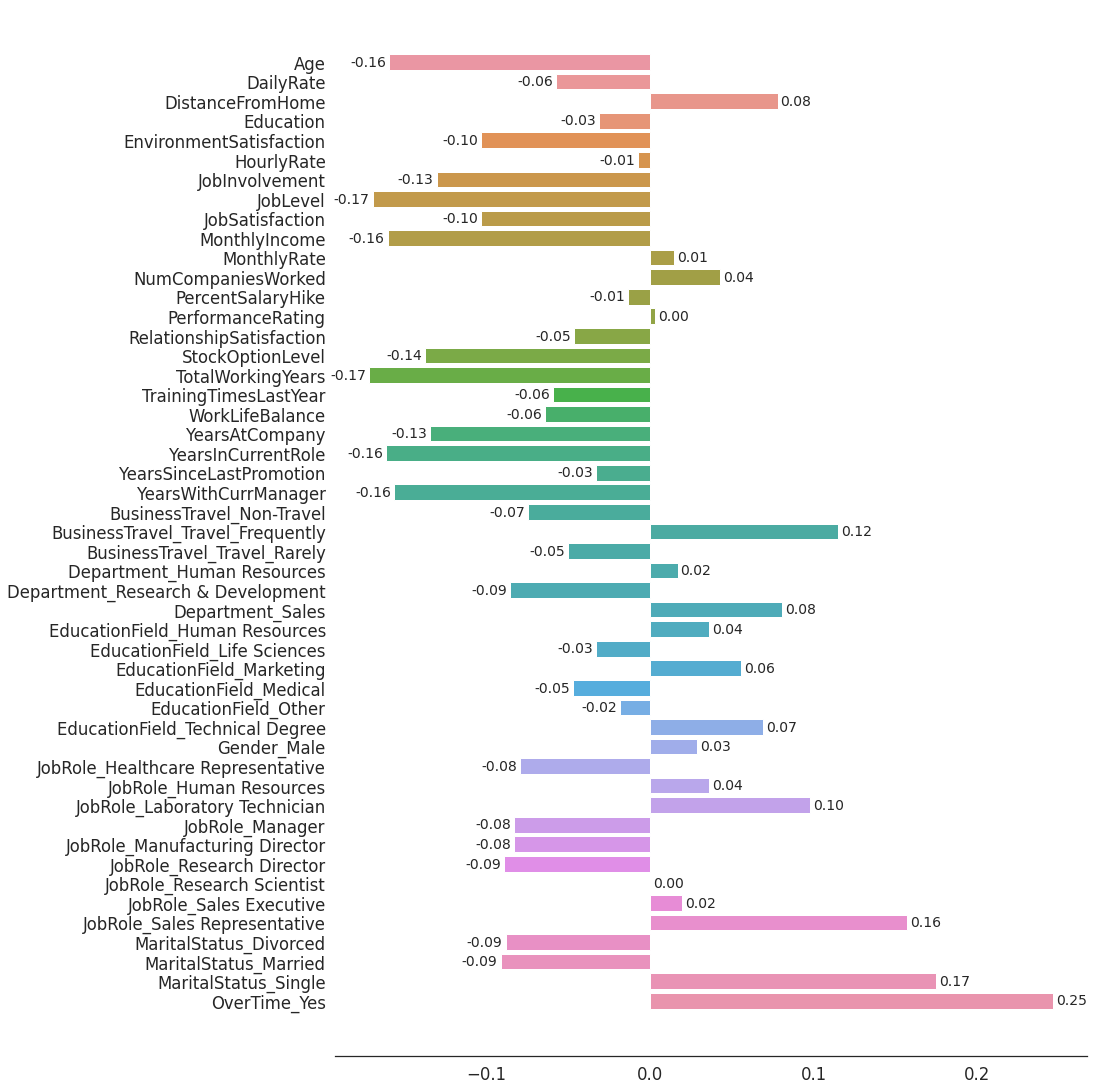

In [63]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['Attrition'].drop('Attrition')

fig, ax = plt.subplots(figsize=(12,18))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.axis('tight')
sns.despine(left=True)
plt.show()

Positive Correlation

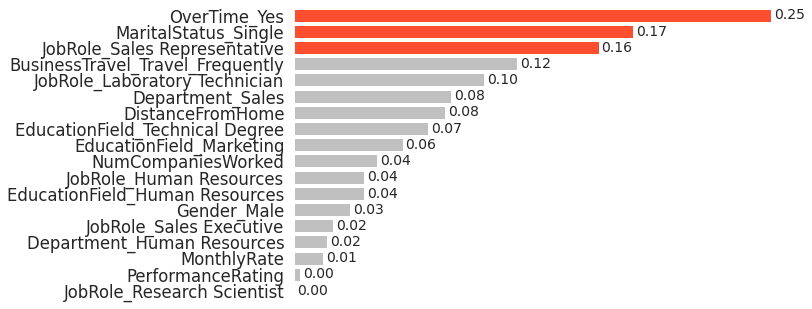

In [64]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['Attrition'].drop('Attrition').sort_values(ascending=False)

corr_positive = corr_target[corr_target >= 0]

threshold_top = 3
palette = []
for i in range(0, len(corr_positive)):
  if i < threshold_top:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x=corr_positive.values, y=corr_positive.index, ax=ax, palette=palette, saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

Negative Correlation

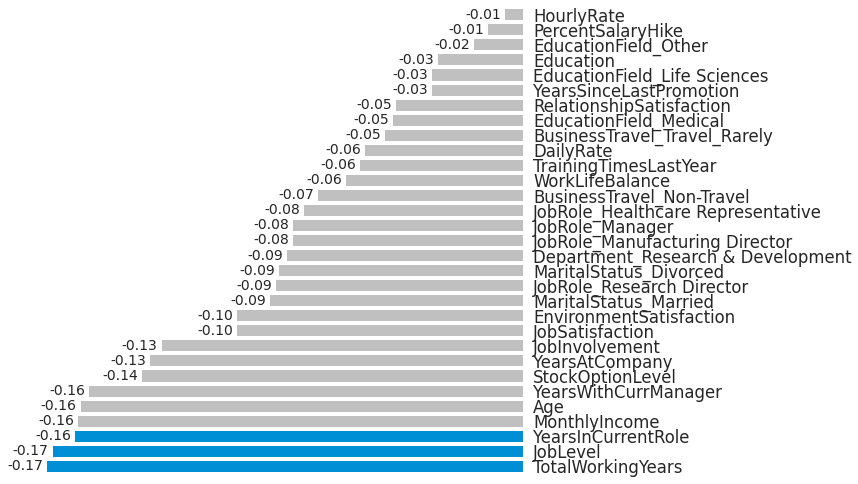

In [65]:
corr_negative = corr_target[corr_target < 0]

threshold_top = 3
threshold_bot = corr_negative.size - threshold_top - 1
palette = []
for i in range(0, len(corr_negative)):
  if i > threshold_bot:
    palette.append('#008FD5') # blue
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x=corr_negative.values, y=corr_negative.index, ax=ax, palette=palette, saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels([])

sns.despine(left=True, bottom=True)
plt.tick_params(right=False)
plt.show()

Oversampling with SMOTE

This dataset is imbalanced. So, my approach to get it balanced is to use SMOTE, one of the oversampling methods.




In [66]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['Attrition'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

In [67]:
data_scale_train['Attrition'].value_counts()

0    863
1    166
Name: Attrition, dtype: int64

In [68]:
data_smote['Attrition'].value_counts()

0    863
1    863
Name: Attrition, dtype: int64

In [69]:
numeric_cols1 = df.select_dtypes(include=['int64','float64']).columns.tolist()
column_numerical2 = ['Age',
 'DailyRate',
 'DistanceFromHome',]

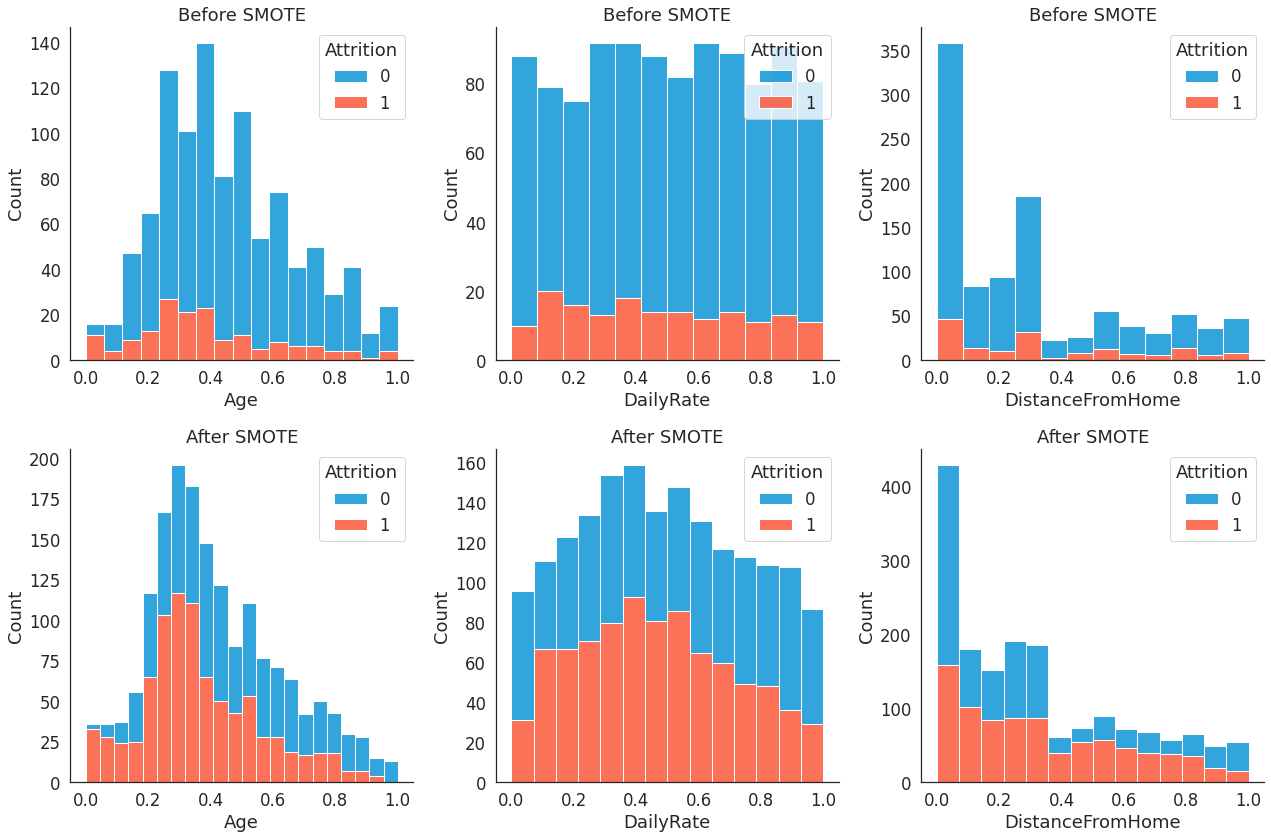

In [70]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical2):
  sns.histplot(data=data_scale_train, x=col, hue='Attrition', multiple='stack', ax=axes_list[i], alpha=0.8)
  axes_list[i].set_title('Before SMOTE')

for i, col in enumerate(column_numerical2):
  sns.histplot(data=data_smote, x=col, hue='Attrition', multiple='stack', ax=axes_list[i+3], alpha=0.8)
  axes_list[i+3].set_title('After SMOTE')

plt.tight_layout()
sns.despine()

plt.show()

Get Score

In [71]:
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

Harmonic Mean

Harmonic mean between accuracy and recall



In [72]:
def fbeta_score(accuracy, recall, beta=1):
  fbeta_score = (1 + beta**2) * (accuracy*recall)/(beta*accuracy+recall)
  
  return fbeta_score

Default Parameter

In [73]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'Ridge Classifier':RidgeClassifier(random_state=1),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

In [74]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

In [75]:
model_list = {
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

In [76]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

Univariate Filter

I will use ANOVA to do feature selection.

In [77]:
threshold = 13

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

print('before filter\t:', X_train_model.shape)
print('after filter\t:', X_train_filter.shape)

before filter	: (1726, 49)
after filter	: (1726, 13)


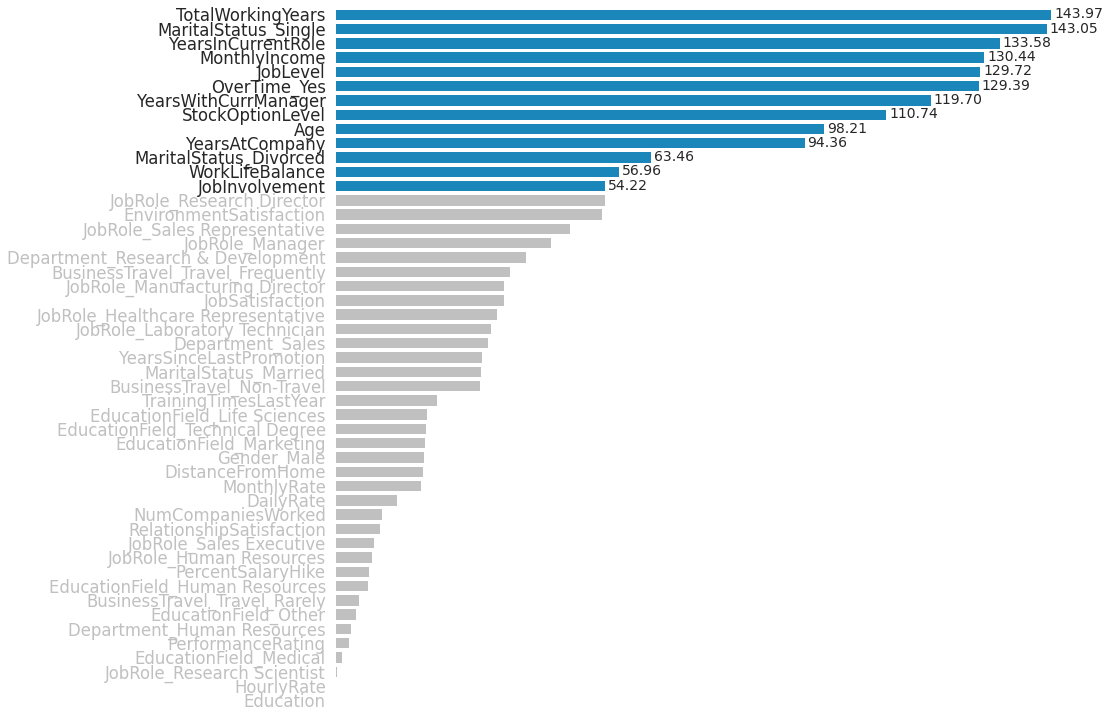

In [78]:
# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
selected = list()
for i in range(0, X_train_model.shape[1]):
  if i < threshold:
    selected.append(True)
  else:
    selected.append(False)

selected_s = pd.Series(selected, name='selected')
feature_selection = pd.concat([feature_selection, selected_s], axis=1)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [79]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_filter = get_score(y_pred_list, y_test_model, average='macro')

Wrapper Method

I will use Recursive Feature Elimination (RFE) method using logistic regression as its base estimator.

In [80]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

threshold = 13
estimator = LogisticRegression(random_state=1)

wrapper = RFE(estimator=estimator, n_features_to_select=threshold)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap = wrapper.transform(X_train_model)
X_test_wrap = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrap.shape)

before wrapper	: (1726, 49)
after wrapper	: (1726, 13)


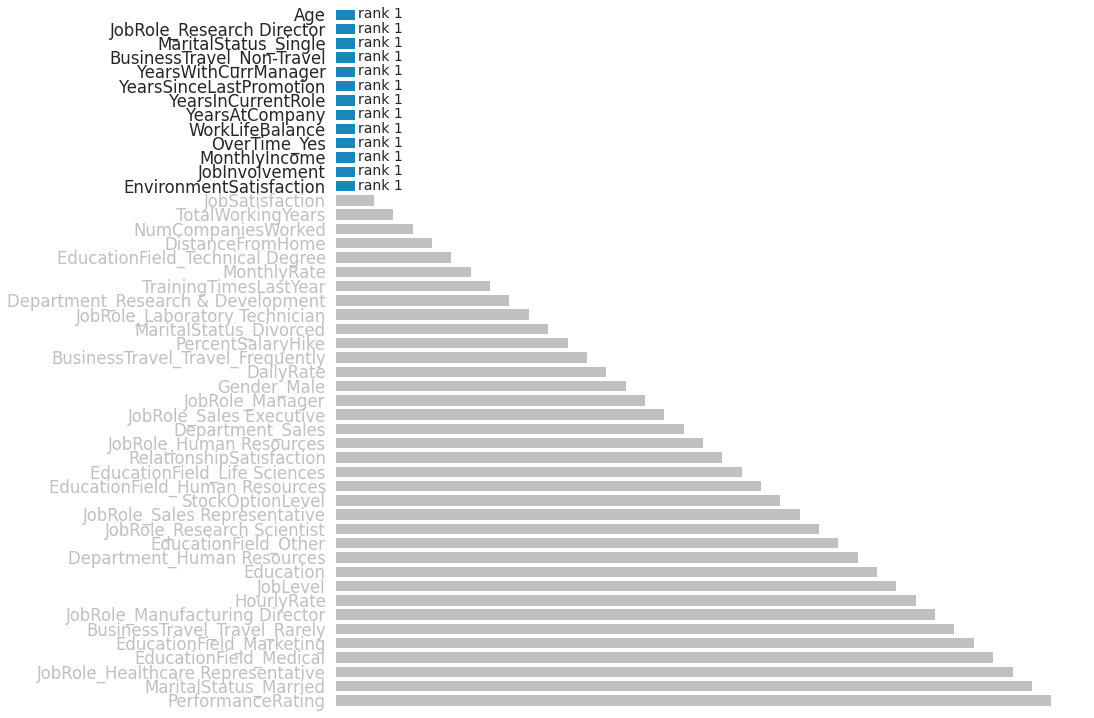

In [81]:
# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=True)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
feature_selection['selected'] = feature_selection['feature_ranking'].apply(lambda x: True if x == 1 else False)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'rank {val:.0f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [82]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrap, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap)

score_wrap = get_score(y_pred_list, y_test_model, average='macro')

Embedded Method

I will use logistic regression as its base estimator.

In [83]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = LogisticRegression(random_state=1)

embedded = SelectFromModel(estimator=estimator, threshold='median')
embedded.fit(X_train_model, y_train_model)

X_train_embed = embedded.transform(X_train_model)
X_test_embed = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed.shape)

before embedded	: (1726, 49)
after embedded	: (1726, 25)


threshold: 0.715


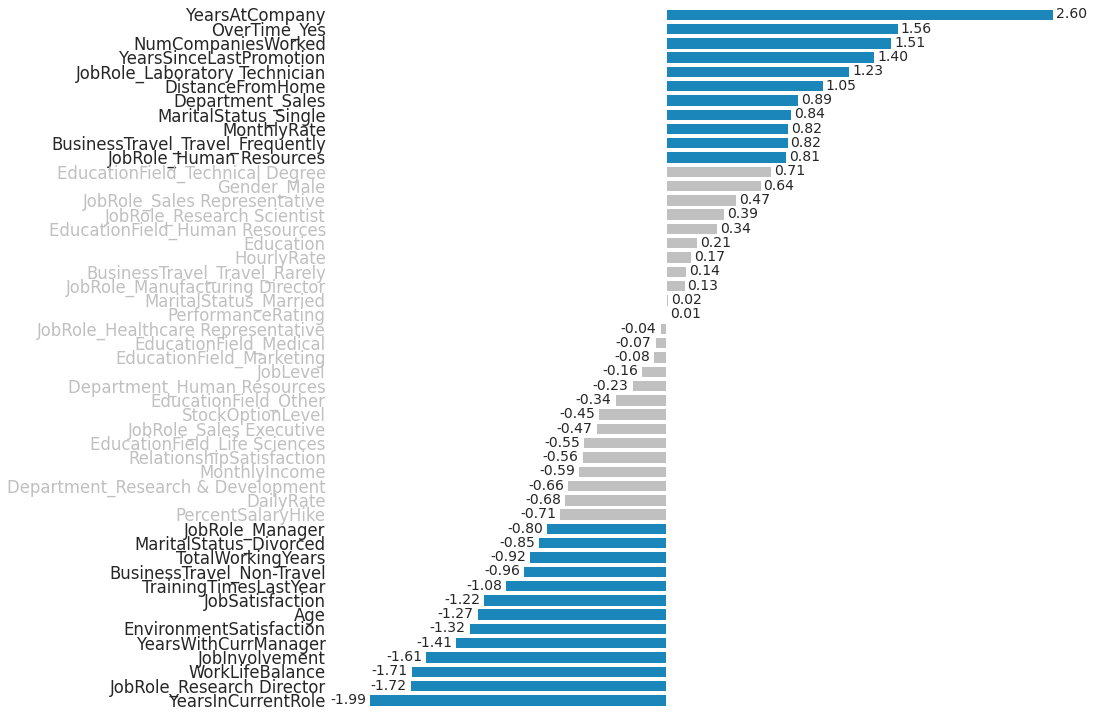

In [84]:
# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.coef_[0]

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
threshold = embedded.threshold_
print(f'threshold: {threshold:.3f}')
feature_selection['selected'] = feature_selection['feature_importance'].apply(lambda x: True if (abs(x) > threshold) else False)

# highlight the top features
palette = []
for flag in feature_selection['selected']:
  if flag:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [85]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed)

score_embed = get_score(y_pred_list, y_test_model, average='macro')

Comparison

I do model performance comparison before and after feature selection. I'll just take the average of each metrics.

In [86]:
score_smote_mean = pd.DataFrame(score_smote.mean(), columns=['original']).T
score_filter_mean = pd.DataFrame(score_filter.mean(), columns=['filter method']).T
score_wrap_mean = pd.DataFrame(score_wrap.mean(), columns=['wrapper method']).T
score_embed_mean = pd.DataFrame(score_embed.mean(), columns=['embedded method']).T

score_compare = pd.concat([score_smote_mean,
                           score_filter_mean,
                           score_wrap_mean,
                           score_embed_mean], axis=0)

score_compare.style.background_gradient(axis=0)

From this table, original feature aka without feature selection have the highest accuracy.

I think, we can also use wrapper method 

On the next step (hyperparameter tuning), I will only use original feature and feature after feature selection using wrapper method.

Hyperparameter Tuning

My tuning strategy focuses on optimizing the positive recall value (not the average) to minimize the occurrence of false negatives, which is when we incorrectly predict customers who actually Attrition as non-Attrition. 

But, I still pay attention to the accuracy score as well.

Anyway, I'd already done the hyperparameter tuning, so I won't cover the process here. As you know, the process takes a long time.

You can do your own tuning if you wish, and maybe you'll get a better result, who knows.

In [87]:
model_list = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

In [88]:
model_list_tuned = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1,
                                                              max_depth=2,
                                                              n_estimators=500,
                                                              learning_rate=0.02),
              
    'AdaBoost Classifier':AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1, max_depth=2),
                                             random_state=1,
                                             n_estimators=80,
                                             learning_rate=0.04),
              
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False,
                                             n_estimators=1000,
                                             learning_rate=0.004,
                                             scale_pos_weight=1.1),
              
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1,
                                                            max_iter=200, 
                                                            learning_rate=0.01,
                                                            max_depth=5),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss',
                            colsample_bytree=0.1,
                            learning_rate=0.005),
              
    'LightGBM':LGBMClassifier(random_state=1,
                              num_leaves=10,
                              n_estimators=175,
                              learning_rate=0.01)
}

Before Tuning

In [89]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_no_fs_not_tuned = get_score(y_pred_list, y_test_model)

After Tuning

In [90]:
y_pred_list = dict()

for name, model in model_list_tuned.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_fs_tuned = get_score(y_pred_list, y_test_model)

Comparison

In [94]:
score_compare_accuracy = score_no_fs_not_tuned.loc[:, ['accuracy']]

score_compare_accuracy = score_compare_accuracy.join(score_fs_tuned.loc[:, ['accuracy']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_accuracy.style.background_gradient(axis=1)

After tuning, the accuracy score is mostly decreased.

In [96]:
score_compare_recall = score_no_fs_not_tuned.loc[:, ['recall']]

score_compare_recall = score_compare_recall.join(score_fs_tuned.loc[:, ['recall']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_recall.style.background_gradient(axis=1)

But, the recall score has increased dramatically. Therefore, I will use the tuned model for model selection.

Model Selection
At first, I was a little hesitant about choosing a model, because I'm paying attention to the recall score and accuracy score at the same time.
<br><br>
At the end of the day, I decided to use the F-beta score to calculate the harmonic mean of accuracy and recall.
<br><br>
$$F_{\beta}=(1+\beta^{2})\frac{accuracy*recall}{\beta*accuracy+recall}$$
<br><br>
Here I use `beta=1`, that means the accuracy and recall are considered as equally important. If you more care about recall, you can change ${\beta}$ to be higher than 1, and vice versa.
<br><br>
You may familiar with this equation from F1 score. Actually, it has the same formula where the `beta=1` (that's why it's called `F1`). But, on F1 score, we use precision instead of accuracy.

In [98]:
#Without Feature Selection
accuracy = score_no_fs_not_tuned['accuracy']
recall = score_no_fs_not_tuned['recall']

score_no_fs_not_tuned['fbeta'] = fbeta_score(accuracy, recall, beta=1)

score_no_fs_not_tuned.loc[:, ['accuracy', 'recall', 'fbeta']].style.background_gradient(axis=0)


As we can see, the AdaBoost Classifier has the highest accuracy score

Contrary, the Hist Gradient Boosting has the highest F-beta score.

Therefore, the selected model that uses all features (without feature selection) is Hist Gradient Boosting.

In [99]:
#With Feature Selection
accuracy = score_fs_tuned['accuracy']
recall = score_fs_tuned['recall']

score_fs_tuned['fbeta'] = fbeta_score(accuracy, recall, beta=1)

score_fs_tuned.loc[:, ['accuracy', 'recall', 'fbeta']].style.background_gradient(axis=0)

 I'll use LightGBM as my final model.


## Explainable AI

Final Model

In [120]:
model = LGBMClassifier(random_state=1, num_leaves=10, n_estimators=175, learning_rate=0.01)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.917     0.897     0.907       370
           1      0.519     0.577     0.547        71

    accuracy                          0.846       441
   macro avg      0.718     0.737     0.727       441
weighted avg      0.853     0.846     0.849       441



In [101]:
y_test_model[101]

0

In [102]:
y_pred[101]

0

Train Accuracy : 0.92 %
Test Accuracy : 0.85 %


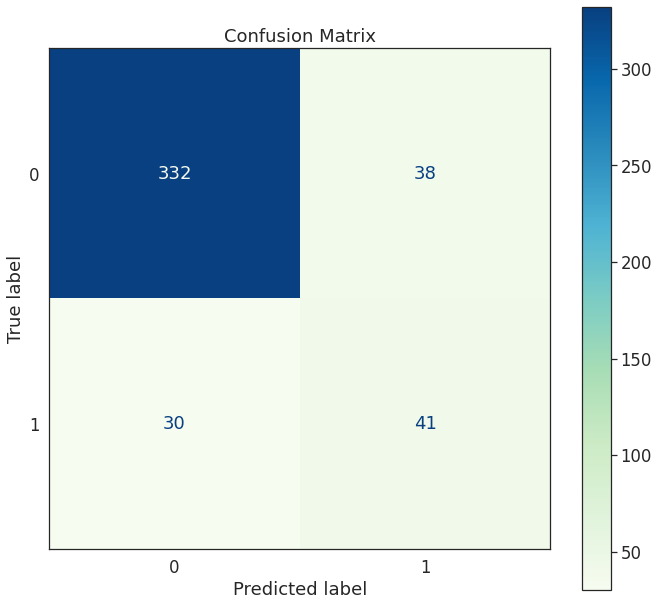

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train_model),y_train_model)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test_model),y_test_model)))

cm = confusion_matrix(y_test_model,model.predict(X_test_model))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp.plot(ax=ax,cmap='GnBu')
plt.show()

# Filter method for reference

In [117]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

threshold = 13

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

# selected feature
selected_feature = filter.get_feature_names_out()

# create selected feature dataframe
X_train_filter_dict = dict()
X_test_filter_dict = dict()

for i, feature in enumerate(selected_feature):
  X_train_filter_dict[feature] = X_train_filter[:,i]
  X_test_filter_dict[feature] = X_test_filter[:,i]

X_train_filter = pd.DataFrame(X_train_filter_dict)
X_test_filter = pd.DataFrame(X_test_filter_dict)

model = HistGradientBoostingClassifier(random_state=1,
                                                            max_iter=200, 
                                                            learning_rate=0.01,
                                                            max_depth=5)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.902     0.868     0.884       370
           1      0.424     0.507     0.462        71

    accuracy                          0.810       441
   macro avg      0.663     0.687     0.673       441
weighted avg      0.825     0.810     0.816       441



Train Accuracy : 0.91 %
Test Accuracy : 0.81 %


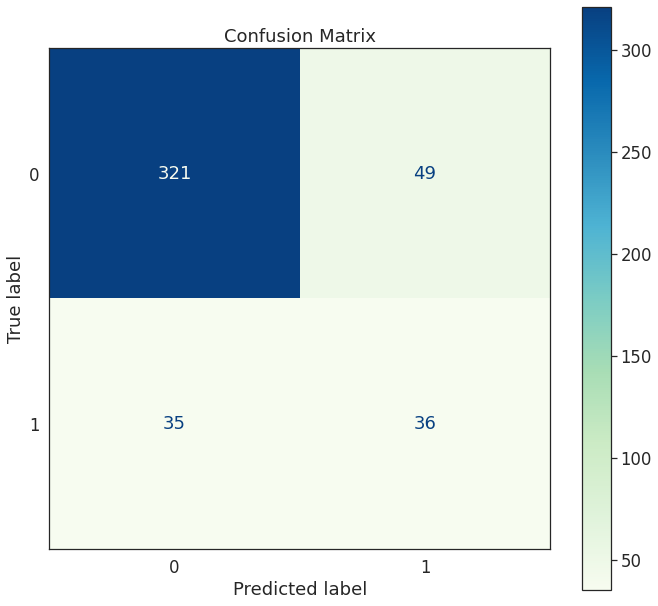

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train_filter),y_train_model)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test_filter),y_test_model)))

cm = confusion_matrix(y_test_model,model.predict(X_test_filter))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp.plot(ax=ax,cmap='GnBu')
plt.show()

#  SHAP Explainer

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model.
<br><br>
See [papers](https://github.com/slundberg/shap#citations) for details and citations.

In [109]:
input_test = pd.DataFrame(X_test_model.iloc[5]).T
input_test

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1468  0.738      0.661             0.036        0.5                      1.0   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1468       0.471           0.333      0.25            0.333          0.229   

      ...  JobRole_Manager  JobRole_Manufacturing Director  \
1468  ...              0.0                             0.0   

      JobRole_Research Director  JobRole_Research Scientist  \
1468                        0.0                         0.0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
1468                      1.0                           0.0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
1468                     0.0                    1.0                   0.0   

      OverTime_Yes  
1468           0.0  

[1 rows x 49 columns]

In [110]:
explainer = shap.Explainer(model)
shap_values_single = explainer(input_test)

expected_value = explainer.expected_value

print(f'Excpected value: {expected_value}')

Excpected value: [-0.03291320858530092, 0.03291320858530092]


In [111]:
shap_values_multiple = explainer(X_test_model)
expected_value = explainer.expected_value

print(f'Excpected value: {expected_value}')

Excpected value: [-0.03291320858530092, 0.03291320858530092]


In [114]:
data_info['StockOptionLevel']

general data types    numerical
total data                 1470
total null                    0
percentage null             0.0
data variation            0 - 3
Name: StockOptionLevel, dtype: object

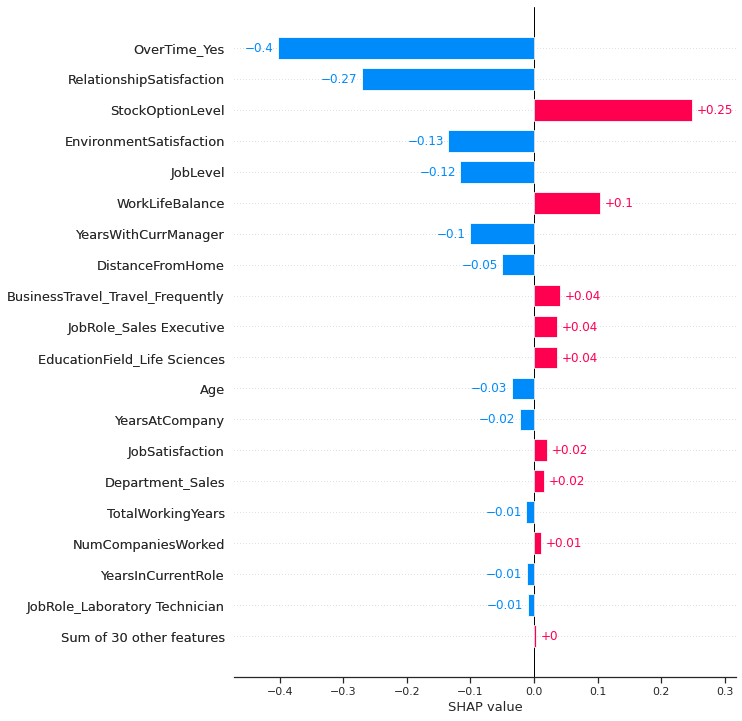

In [112]:
shap.plots.bar(shap_values_single[:,:,-1][0], max_display=20)

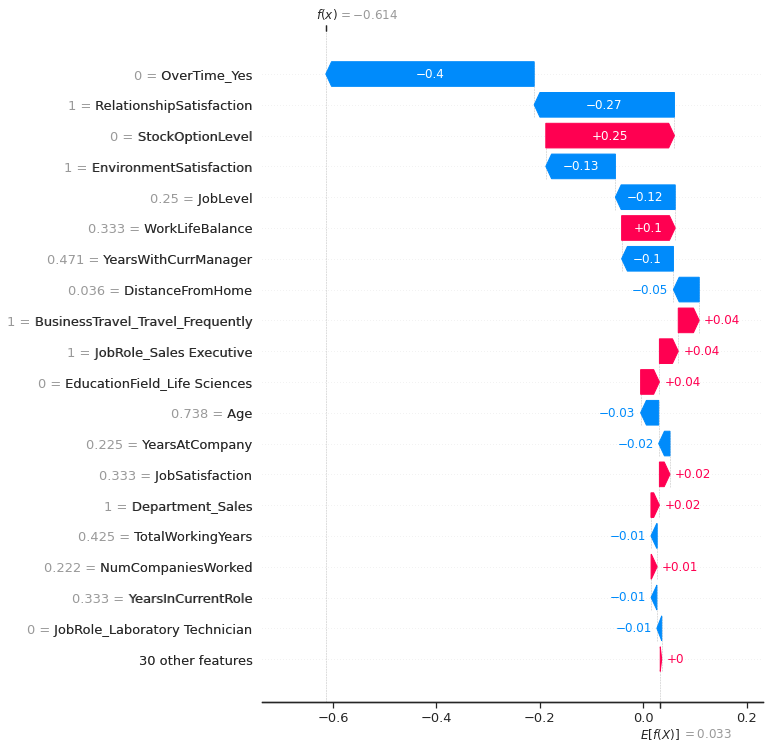

In [115]:
shap.plots.waterfall(shap_values_single[:,:,-1][0], max_display=20)

In [116]:
shap.initjs()

shap.plots.force(expected_value[-1], shap_values_single[:,:,-1].values, input_test.columns)